# <span style="color:SeaGreen">  Part 1 :</span><span style="color:DarkSlateBlue"> Football Transfer Market Data EDA</span>

## <span style="color:Teal"> Contents</span>


#### Initial Data Understanding of Multiple Datasets

    Reading in Data
    
    Exploratory Data Analysis (EDA): Characterising the Datasets
    
    Identifying Missing Values
    
    Identifying Duplicate Entries
    
    Identifying Outliers
    
    EDA : Descriptive Statistics
    
    Feature Engineering: Generation
        
    EDA : Distribution of the Target Variable : Player Transfer Market Valuation (in euros)
    
#### Initial Preprocessing : Data Cleaning and Preperation
    
    Data Preprocessing
    
    Imputing Missing Values
        
        Imputing using the Mean
        
        Imputing using the Median
        
        Imputing using KNNImputer
        
    Feature Engineering: Generation

#### Merging Datasets    

    Feature Engineering: Feature Selection & Generation
    
#### Data Understanding of Merged Dataset

    Exploratory Data Analysis (EDA): Characterising the Datasets
    
    EDA : Descriptive Statistics
    
    EDA : Univariate with Graphics
        
        Visualising the Frequency Distribution for Variables using Histograms
        
        Visualising the Variance and Outliers for Variables using Boxplots
        
        Design Considerations
        
        Analysis on the Current Player Market       
    
    EDA : Bivariate with Graphics
    
        Relationship between Quantitative Variables and Target Variable: Player Market Value
        
        Evaluating Changes in Market Value Over Time
        
        Analysis of Current Player Market Valuations by Player Categorical Attributes
        
        Analysis on the Current Player Market Valuations by Player Performance Statistics
        
        Analysis of the Last full Season : 2022-2023
        
#### Writing to Disk

#### References

#### <span style="color:Teal"> Importing Dependencies</span>

In [124]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from datetime import datetime
import os
import missingno as msno

import matplotlib.ticker as ticker
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox

import warnings# Import this library to suppress the warnings
warnings.filterwarnings('ignore')   # The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings

#  <span style="color:SeaGreen">  Data Understanding </span>

#### <span style="color:Teal"> Loading the datasets</span>

In [125]:
# List of file names
file_names = ["appearances", "club_games", "clubs", "competitions", "game_events", "game_lineups", "games", "player_valuations", "players"]

# List to store DataFrames
dataframes = []

# Loop through each file name
for file_name in file_names:
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(f"{file_name}.csv")
    
    # Assign the DataFrame to the variable name
    globals()[f"{file_name}_df"] = df
    
    # Print name and shape of the DataFrame
    print(f"{file_name}_df:", df.shape)
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Print a message indicating that data import is complete
print('Data imported successfully!')

appearances_df: (1485697, 13)
club_games_df: (128586, 11)
clubs_df: (426, 16)
competitions_df: (43, 10)
game_events_df: (652010, 10)
game_lineups_df: (86822, 9)
games_df: (64293, 23)
player_valuations_df: (440663, 9)
players_df: (30302, 23)
Data imported successfully!


# <span style="color:SeaGreen">  EDA :</span><span style="color:DarkSlateBlue"> Characterising the Datasets</span>

#### <span style="color:Teal"> Exploring Datasets Dimensions, Datatypes, Unique Values and Descriptive Statistics </span>

In [126]:
# printing the top 5 entries, info, number of unique values and describe for each dataframes statistics

for i, df in enumerate(dataframes):
    print("\n*************************************************************************************")
    print(file_names[i], df.shape)
    print("*************************************************************************************")
    print("\nhead:\n")
    print(df.head())
    print("\nGeneral information:\n")
    print(df.info())
    print("\nNumber of uniques values:\n")
    print(df.nunique())
    print("\nStatistical description:\n")
    print(df.describe())


*************************************************************************************
appearances (1485697, 13)
*************************************************************************************

head:

    appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0   2231978_38004  2231978      38004             853                     235   
1   2233748_79232  2233748      79232            8841                    2698   
2   2234413_42792  2234413      42792            6251                     465   
3   2234418_73333  2234418      73333            1274                    6646   
4  2234421_122011  2234421     122011             195                    3008   

         date       player_name competition_id  yellow_cards  red_cards  \
0  2012-07-03  Aurélien Joachim            CLQ             0          0   
1  2012-07-05    Ruslan Abyshov            ELQ             0          0   
2  2012-07-05       Sander Puri            ELQ             0          0   
3  201

game_event_id       652010
date                  3358
game_id              64149
minute                 121
type                     4
club_id               2574
player_id            51478
description           4570
player_in_id         50149
player_assist_id      9439
dtype: int64

Statistical description:

         game_id    minute   club_id  player_id  player_in_id  \
count  652010.00 652010.00 652010.00  652010.00     413164.00   
mean  3027107.31     63.49   4548.50  196219.61     238608.36   
std    591858.34     21.91  10796.11  183400.31     204395.09   
min   2211607.00     -1.00      1.00      10.00         10.00   
25%   2481046.00     51.00    336.00   56416.00      73097.00   
50%   2942767.00     68.00    984.00  135229.00     186368.00   
75%   3553565.00     80.00   3015.00  286297.00     344107.00   
max   4196249.00    120.00 112755.00 1195049.00    1195054.00   

       player_assist_id  
count          29158.00  
mean          114200.48  
std           157525.45  


       player_id  last_season  market_value_in_eur         n  current_club_id
count  440663.00    440663.00            440663.00 440663.00        440663.00
mean   196411.30      2018.76           2357556.83      1.00          4041.89
std    179362.18         3.62           6603356.32      0.00          9508.38
min        10.00      2012.00             10000.00      1.00             3.00
25%     55322.00      2016.00            200000.00      1.00           368.00
50%    140748.00      2019.00            500000.00      1.00          1010.00
75%    289645.00      2022.00           1600000.00      1.00          2944.00
max   1166093.00      2023.00         200000000.00      1.00         83678.00

*************************************************************************************
players (30302, 23)
*************************************************************************************

head:

   player_id first_name   last_name              name  last_season  \
0        598       Timo  Hi

In [127]:
# Initial enquiry into missing values

for i, df in enumerate(dataframes):
    print("\n*************************************************************************************")
    print(file_names[i], df.shape)
    print("*************************************************************************************\n")
    print(df.isnull().sum())
    print(f"\nThe total number of missing values in {file_names[i]} dataframe are: ",df.isna().sum().sum(), f"out of {df.size}." )
    print(f"\nThat is equal to ", round(((df.isna().sum().sum()) / (df.size)) * 100, 2), "percent." )


*************************************************************************************
appearances (1485697, 13)
*************************************************************************************

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

The total number of missing values in appearances dataframe are:  324 out of 19314061.

That is equal to  0.0 percent.

*************************************************************************************
club_games (128586, 11)
*************************************************************************************

game_id                      0
club_id                      0
own_goals        

In [128]:
# Initial enquiry into missing values

for i, df in enumerate(dataframes):
    print("\n*************************************************************************************")
    print(file_names[i], df.shape)
    print(f"\nThe total number of missing values in {file_names[i]} dataframe are: ",df.isna().sum().sum(), f"out of {df.size}." )
    print(f"\nThat is equal to ", round(((df.isna().sum().sum()) / (df.size)) * 100, 2), "percent." )


*************************************************************************************
appearances (1485697, 13)

The total number of missing values in appearances dataframe are:  324 out of 19314061.

That is equal to  0.0 percent.

*************************************************************************************
club_games (128586, 11)

The total number of missing values in club_games dataframe are:  79412 out of 1414446.

That is equal to  5.61 percent.

*************************************************************************************
clubs (426, 16)

The total number of missing values in clubs dataframe are:  937 out of 6816.

That is equal to  13.75 percent.

*************************************************************************************
competitions (43, 10)

The total number of missing values in competitions dataframe are:  14 out of 430.

That is equal to  3.26 percent.

*************************************************************************************
game_eve

As we can see above, some dataframes contain observations with as much as 18% missing values. As a general rule of thumb, if a feature contains more than 50% missing values, it may be justified to remove that column. If an observation contains over 20% missing values it may be justified in removing that row.are treated i.e. Missing values will need to be addressed,and how they are handled will depend on the nature of the missing values, whether Missing Completely at Random (MCAR), Missing at Random (MAR) or Missing Not at Random (MNAR), the use case, and ultimately project objectives. At a glance, many of the missing values above are from features that will not be required in evaluating player market values. They will be retained for now but will need to be addressed following the selection and merging of the required datasets for modelling.

In [129]:
# Removing columns with over 50% of mssing values

for df in dataframes:
    df.dropna(thresh = df.shape[0] * 0.5, axis = 1, inplace=True)
    
    
for i, df in enumerate(dataframes):
    print("\n*************************************************************************************")
    print(file_names[i], df.shape)
    print("*************************************************************************************\n")
    print(df.isnull().sum())
    print(f"\nThe total number of missing values in {file_names[i]} dataframe are: ",df.isna().sum().sum(), f"out of {df.size}." )
    print(f"\nThat is equal to ", round(((df.isna().sum().sum()) / (df.size)) * 100, 2), "percent." )


*************************************************************************************
appearances (1485697, 13)
*************************************************************************************

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

The total number of missing values in appearances dataframe are:  324 out of 19314061.

That is equal to  0.0 percent.

*************************************************************************************
club_games (128586, 11)
*************************************************************************************

game_id                      0
club_id                      0
own_goals        

In [130]:
# Checking for duplicate entries and displaying the results using ptint()

for i, df in enumerate(dataframes):
    duplicateRows = df[df.duplicated()]
    print("\n*************************************************************************************")
    print(f"\nThe total number of duplicate rows in {file_names[i]} dataframe is {duplicateRows.value_counts().sum()} out of {df.size}." )
    print(f"\nThat is equal to ", round(((duplicateRows.value_counts().sum()) / (df.size)) * 100, 2), "percent.")


*************************************************************************************

The total number of duplicate rows in appearances dataframe is 0 out of 19314061.

That is equal to  0.0 percent.

*************************************************************************************

The total number of duplicate rows in club_games dataframe is 0 out of 1414446.

That is equal to  0.0 percent.

*************************************************************************************

The total number of duplicate rows in clubs dataframe is 0 out of 5964.

That is equal to  0.0 percent.

*************************************************************************************

The total number of duplicate rows in competitions dataframe is 0 out of 430.

That is equal to  0.0 percent.

*************************************************************************************

The total number of duplicate rows in game_events dataframe is 0 out of 5216080.

That is equal to  0.0 percent.

******

As of now, there are now duplicate entries within any of the datasets

#### <span style="color:Teal"> Displaying a Profile Report for each dataset</span>

In [74]:
from ydata_profiling import ProfileReport #importing profile report attribute


KeyboardInterrupt



In [ ]:
ProfileReport(appearances_df)# generating a profile report of the dataset

In [ ]:
ProfileReport(club_games_df)

In [ ]:
ProfileReport(clubs_df)

In [ ]:
ProfileReport(competitions_df)

In [ ]:
ProfileReport(game_events_df)

In [ ]:
ProfileReport(game_lineups_df)

In [ ]:
ProfileReport(games_df)

In [ ]:
ProfileReport(player_valuations_df)

In [15]:
ProfileReport(players_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After evaluating the findings of the profile reports it is evident that there are two outliers within the players height column in the players_df with a value of 18cm. The mean and std deviation for the column is 182.5cm and 6.9cm respectively. The value is more than likey missing a digit.

In [131]:
# locating the outliers
players_df[players_df['height_in_cm'] == 18]

player_id first_name    last_name               name  last_season  \
6846     592398      Aïssa  Boudechicha  Aïssa Boudechicha         2021   
8716     628490      Genar       Fornés       Genar Fornés         2021   

      current_club_id        player_code country_of_birth city_of_birth  \
6846               40  aissa-boudechicha              NaN       Medjana   
8716             2687       genar-fornes            Spain     Barcelona   

     country_of_citizenship date_of_birth sub_position  position  foot  \
6846                Algeria    2000-04-13    Left-Back  Defender  left   
8716                  Spain    2000-01-17    Left-Back  Defender  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
6846         18.00            150000.00                    150000.00   
8716         18.00            150000.00                    150000.00   

     contract_expiration_date  \
6846      2023-06-30 00:00:00   
8716      2023-06-30 00:00:00   

                                              image_url  \
6846  https://img.a.transfermarkt.technology/portrai...   
8716  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
6846  https://www.transfermarkt.co.uk/aissa-boudechi...   
8716  https://www.transfermarkt.co.uk/genar-fornes/p...   

     current_club_domestic_competition_id      current_club_name  
6846                                  FR1  FC Girondins Bordeaux  
8716                                  ES1               Cádiz CF

Options for handling outliers include removing the entry, imputing the height with the mean or mode, or replacing it with the correct value sourced from reliable source. I have decided to replace the error value for height with correct value sourced from transfermarkt (www.transfermarkt.co.uk, n.d.) (www.transfermarkt.co.uk, n.d.).

In [132]:
players_df[players_df['name'] == 'Genar Fornés']

player_id first_name last_name          name  last_season  \
8716     628490      Genar    Fornés  Genar Fornés         2021   

      current_club_id   player_code country_of_birth city_of_birth  \
8716             2687  genar-fornes            Spain     Barcelona   

     country_of_citizenship date_of_birth sub_position  position  foot  \
8716                  Spain    2000-01-17    Left-Back  Defender  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
8716         18.00            150000.00                    150000.00   

     contract_expiration_date  \
8716      2023-06-30 00:00:00   

                                              image_url  \
8716  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
8716  https://www.transfermarkt.co.uk/genar-fornes/p...   

     current_club_domestic_competition_id current_club_name  
8716                                  ES1          Cádiz CF

In [133]:
# Replacing the incorrect height with the correct value
players_df.loc[players_df['name'] == 'Genar Fornés', 'height_in_cm'] = 180

players_df.loc[players_df['name'] == 'Aïssa Boudechicha', 'height_in_cm'] = 180

# Both players are the same height so alternatively the code below could be used to correct their height values

#players_df['height_in_cm'].replace(18, 180, inplace=True)

In [134]:
# Confirming new height
players_df[players_df['name'] == 'Genar Fornés']

player_id first_name last_name          name  last_season  \
8716     628490      Genar    Fornés  Genar Fornés         2021   

      current_club_id   player_code country_of_birth city_of_birth  \
8716             2687  genar-fornes            Spain     Barcelona   

     country_of_citizenship date_of_birth sub_position  position  foot  \
8716                  Spain    2000-01-17    Left-Back  Defender  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
8716        180.00            150000.00                    150000.00   

     contract_expiration_date  \
8716      2023-06-30 00:00:00   

                                              image_url  \
8716  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
8716  https://www.transfermarkt.co.uk/genar-fornes/p...   

     current_club_domestic_competition_id current_club_name  
8716                                  ES1          Cádiz CF

In [135]:
# Confirming new height
players_df[players_df['name'] == 'Aïssa Boudechicha']

player_id first_name    last_name               name  last_season  \
6846     592398      Aïssa  Boudechicha  Aïssa Boudechicha         2021   

      current_club_id        player_code country_of_birth city_of_birth  \
6846               40  aissa-boudechicha              NaN       Medjana   

     country_of_citizenship date_of_birth sub_position  position  foot  \
6846                Algeria    2000-04-13    Left-Back  Defender  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
6846        180.00            150000.00                    150000.00   

     contract_expiration_date  \
6846      2023-06-30 00:00:00   

                                              image_url  \
6846  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
6846  https://www.transfermarkt.co.uk/aissa-boudechi...   

     current_club_domestic_competition_id      current_club_name  
6846                                  FR1  FC Girondins Bordeaux

In [136]:
# Confirming that the outliers values for height are corrected
players_df[players_df['height_in_cm'] == 18]

Empty DataFrame
Columns: [player_id, first_name, last_name, name, last_season, current_club_id, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, image_url, url, current_club_domestic_competition_id, current_club_name]
Index: []

### Exploring the player 'market_value_in_eur' feature...
..With the hope of merging values from the 'player_valuations_df' and 'players_df' to replace missing values

In [137]:
player_valuations_df.nunique()

player_id                              28794
last_season                               12
datetime                                4817
date                                    4817
dateweek                                 972
market_value_in_eur                      423
n                                          1
current_club_id                          424
player_club_domestic_competition_id       14
dtype: int64

In [138]:
player_valuations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440663 entries, 0 to 440662
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            440663 non-null  int64 
 1   last_season                          440663 non-null  int64 
 2   datetime                             440663 non-null  object
 3   date                                 440663 non-null  object
 4   dateweek                             440663 non-null  object
 5   market_value_in_eur                  440663 non-null  int64 
 6   n                                    440663 non-null  int64 
 7   current_club_id                      440663 non-null  int64 
 8   player_club_domestic_competition_id  440663 non-null  object
dtypes: int64(5), object(4)
memory usage: 30.3+ MB


In [139]:
players_df.nunique()

player_id                               30302
first_name                               6551
last_name                               22310
name                                    29662
last_season                                12
current_club_id                           424
player_code                             29628
country_of_birth                          184
city_of_birth                            8184
country_of_citizenship                    180
date_of_birth                            8892
sub_position                               13
position                                    5
foot                                        3
height_in_cm                               49
market_value_in_eur                       125
highest_market_value_in_eur               204
contract_expiration_date                   98
image_url                               24683
url                                     30302
current_club_domestic_competition_id       14
current_club_name                 

In [140]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30302 non-null  int64  
 1   first_name                            28337 non-null  object 
 2   last_name                             30302 non-null  object 
 3   name                                  30302 non-null  object 
 4   last_season                           30302 non-null  int64  
 5   current_club_id                       30302 non-null  int64  
 6   player_code                           30302 non-null  object 
 7   country_of_birth                      27613 non-null  object 
 8   city_of_birth                         28099 non-null  object 
 9   country_of_citizenship                29759 non-null  object 
 10  date_of_birth                         30255 non-null  object 
 11  sub_position   

In [141]:
market_values_A = player_valuations_df[player_valuations_df['last_season'] == 2023].copy()

In [142]:
market_values_A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101275 entries, 186 to 440661
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            101275 non-null  int64 
 1   last_season                          101275 non-null  int64 
 2   datetime                             101275 non-null  object
 3   date                                 101275 non-null  object
 4   dateweek                             101275 non-null  object
 5   market_value_in_eur                  101275 non-null  int64 
 6   n                                    101275 non-null  int64 
 7   current_club_id                      101275 non-null  int64 
 8   player_club_domestic_competition_id  101275 non-null  object
dtypes: int64(5), object(4)
memory usage: 7.7+ MB


In [143]:
market_values_A.head()

player_id  last_season             datetime        date    dateweek  \
186       3333         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
343       4391         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
743       8246         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
782       9500         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
884      12029         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   

     market_value_in_eur  n  current_club_id  \
186              7500000  1             1237   
343              1300000  1              383   
743                50000  1                3   
782               750000  1              903   
884              1500000  1             1421   

    player_club_domestic_competition_id  
186                                 GB1  
343                                 NL1  
743                                  L1  
782                                 SC1  
884                                 FR1

In [144]:
pd.set_option('display.max_row', None) # to display max 100 rows

In [145]:
market_values_A['dateweek'].value_counts()

dateweek
2020-04-06    3523
2021-12-27    1967
2022-11-07    1816
2023-06-12    1815
2023-06-19    1769
2022-05-30    1686
2018-12-17    1601
2019-12-16    1432
2022-06-06    1391
2022-10-31    1381
2019-06-10    1294
2020-10-12    1263
2021-06-07    1235
2019-06-03    1198
2021-05-31    1168
2023-06-26    1152
2021-12-20    1068
2020-12-28     949
2018-05-28     925
2015-06-29     923
2019-12-09     905
2016-07-11     900
2018-06-04     868
2022-01-03     854
2021-01-04     816
2017-06-26     791
2023-06-05     765
2021-03-15     752
2017-06-05     739
2021-10-11     725
2018-01-01     657
2021-02-08     651
2021-05-17     632
2019-06-24     607
2021-10-04     582
2022-09-12     579
2022-06-27     576
2022-06-13     575
2022-10-24     572
2021-12-13     559
2023-03-13     552
2021-05-24     550
2020-07-27     537
2020-12-21     532
2020-10-05     521
2022-06-20     514
2022-03-28     504
2021-06-28     503
2023-03-20     492
2022-12-19     471
2016-02-01     468
2022-12-05     451
201

In [146]:
sorted_dateweek_counts = market_values_A['dateweek'].value_counts().sort_index()

In [147]:
sorted_dateweek_counts

dateweek
2004-10-04      20
2004-10-11       1
2004-10-18       1
2004-11-01       1
2004-11-15       1
2004-11-22       1
2004-12-06       1
2004-12-13       1
2004-12-27       1
2005-01-10       4
2005-01-17       2
2005-01-24       1
2005-01-31       5
2005-02-07       1
2005-02-14       2
2005-02-21       1
2005-03-07       2
2005-03-14       2
2005-03-28       3
2005-04-18       1
2005-04-25       1
2005-06-13       1
2005-07-04       2
2005-07-11       1
2005-07-18       2
2005-07-25       2
2005-08-01       2
2005-08-08       2
2005-08-15       2
2005-08-29       2
2005-09-12       3
2005-09-19       1
2005-10-03       1
2005-10-10       4
2005-10-17       1
2005-10-24       4
2005-11-14       1
2005-11-21       2
2005-11-28       2
2005-12-05       5
2005-12-19       1
2005-12-26       1
2006-01-09       2
2006-01-16       1
2006-01-23       2
2006-01-30       3
2006-02-06       1
2006-02-13       1
2006-02-20       2
2006-02-27       2
2006-03-13       2
2006-04-10       2
200

In [148]:
#market_values_A = player_valuations_df[['player_id', 'market_value_in_eur']]

In [149]:
print(market_values_A.shape)
print(market_values_A.head())
print(market_values_A.nunique())

(101275, 9)
     player_id  last_season             datetime        date    dateweek  \
186       3333         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
343       4391         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
743       8246         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
782       9500         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   
884      12029         2023  2004-10-04 00:00:00  2004-10-04  2004-10-04   

     market_value_in_eur  n  current_club_id  \
186              7500000  1             1237   
343              1300000  1              383   
743                50000  1                3   
782               750000  1              903   
884              1500000  1             1421   

    player_club_domestic_competition_id  
186                                 GB1  
343                                 NL1  
743                                  L1  
782                                 SC1  
884                             

In the best case ther are only 6407 values for unique player_id. Less then what the players_df currently contains (19383).

In [150]:
market_values_B = player_valuations_df.copy()

In [151]:
market_values_B = pd.to_datetime(market_values_B['dateweek'])


In [152]:
market_values_B = player_valuations_df[player_valuations_df['dateweek'] > '2022-12-31']

In [153]:
market_values_B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15569 entries, 425094 to 440662
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   player_id                            15569 non-null  int64 
 1   last_season                          15569 non-null  int64 
 2   datetime                             15569 non-null  object
 3   date                                 15569 non-null  object
 4   dateweek                             15569 non-null  object
 5   market_value_in_eur                  15569 non-null  int64 
 6   n                                    15569 non-null  int64 
 7   current_club_id                      15569 non-null  int64 
 8   player_club_domestic_competition_id  15569 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [154]:
market_values_B.nunique()

player_id                              12602
last_season                               12
datetime                                 148
date                                     148
dateweek                                  37
market_value_in_eur                      125
n                                          1
current_club_id                          413
player_club_domestic_competition_id       14
dtype: int64

In the best case ther are only 12602 values for unique player_id. Less then what the players_df currently contains (19383).

In [155]:
market_values_C = players_df[['player_id', 'market_value_in_eur']]

In [156]:
print(market_values_C.shape)
print(market_values_C.head())
print(market_values_C.nunique())

(30302, 2)
   player_id  market_value_in_eur
0        598                  NaN
1        670                  NaN
2       1323                  NaN
3       3195                  NaN
4       3259                  NaN
player_id              30302
market_value_in_eur      125
dtype: int64


We will readdress the missing values in 'market_value_in_eur' and 'highest_market_value_in_eur' below.

In [157]:
#players_df[players_df['current_club_name'] == 'Real Madrid']

# <span style="color:SeaGreen">  Feature Engineering :</span><span style="color:DarkSlateBlue"> Feature Generation</span>

#### <span style="color:Teal"> Preprocessing before feature generation</span>

In [158]:
players_df.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'image_url',
       'url', 'current_club_domestic_competition_id', 'current_club_name'],
      dtype='object')

In [159]:
pd.set_option('display.max_columns', None) # to display all columns

In [160]:
players_df['date_of_birth'].describe()

count          30255
unique          8892
top       1996-01-19
freq              20
Name: date_of_birth, dtype: object

In [161]:
players_df[players_df['date_of_birth'].isnull() == True]

player_id  first_name     last_name                 name  last_season  \
2720      335646        Nick          Volk            Nick Volk         2015   
2756      345068    Abdullah       Karakoc     Abdullah Karakoc         2014   
3029      539248       Kalle   Christensen    Kalle Christensen         2017   
3144      640558      Damian  van der Haar  Damian van der Haar         2021   
3387       16565      Daniel        Halfar        Daniel Halfar         2014   
4328      221883       Abdul         Basit          Abdul Basit         2016   
5105      714313        José       Salinas         José Salinas         2020   
5493       58379  Maximilian       Beister   Maximilian Beister         2015   
6774      531161      Rasmus  Horup Hansen  Rasmus Horup Hansen         2017   
6834      573816     Ibrahim         Suaib        Ibrahim Suaib         2017   
7427       83188        Marc          Lais            Marc Lais         2012   
10522     523200  Kristoffer        Larsen    Kristoffer Larsen         2017   
11068      50765      Mahmut         Temür         Mahmut Temür         2014   
11879      42463        Timo       Gebhart         Timo Gebhart         2013   
11889      51190        Marc     Vucinovic       Marc Vucinovic         2014   
12295     457583     Dimitri        Swisch       Dimitri Swisch         2013   
12447     576729      Sergiy        Rusyan        Sergiy Rusyan         2017   
12585     701335       Cihat       Topatan        Cihat Topatan         2021   
12711    1067951      Hjalte    Toftegaard    Hjalte Toftegaard         2022   
12871      36189   Christian         Dorda      Christian Dorda         2014   
13768        837     Thorben          Marx         Thorben Marx         2014   
13770       2950      Robert         Almer         Robert Almer         2014   
14571        299      Fabian         Ernst         Fabian Ernst         2012   
15882      94598      Stefan  Wannenwetsch  Stefan Wannenwetsch         2015   
16200     632716       Kalle           Bak            Kalle Bak         2019   
16419       3942      Martin         Lanig         Martin Lanig         2014   
16432       6322     Patrick        Helmes       Patrick Helmes         2014   
17349     335635         Jan        Finger           Jan Finger         2015   
17458     381132      Daniel          Thur          Daniel Thur         2016   
18362      20444      Tobias          Weis          Tobias Weis         2013   
19255     328791      Miguel  Blanco-Lopez  Miguel Blanco-Lopez         2016   
19350     381134    Johannes         Wolff       Johannes Wolff         2016   
21385     546133    Johannes         Frahm       Johannes Frahm         2019   
22259      49681       Aykut        Öztürk         Aykut Öztürk         2013   
22986     335633        Noel     Wembacher       Noel Wembacher         2015   
23974     879619         Sem         Bonte            Sem Bonte         2022   
24644     246051      Martin        Haesum        Martin Haesum         2012   
25460       1944       Deniz         Dogan          Deniz Dogan         2013   
25874     521323    Filippos        Selkos      Filippos Selkos         2019   
25926       1587       Mario      Eggimann       Mario Eggimann         2012   
26032      32611       Sezer         Badur          Sezer Badur         2015   
26043      58124      Julian      Schieber      Julian Schieber         2020   
26252     116272    Benedikt        Röcker      Benedikt Röcker         2018   
26458     202753        Oguz       Özcelik         Oguz Özcelik         2012   
27385    1086787       Demba       N'Diaye        Demba N'Diaye         2022   
27390    1173042       Djibi          Seck           Djibi Seck         2023   
29562     539732       Yuriy        Berdey         Yuriy Berdey         2017   

       current_club_id          player_code country_of_birth  \
2720               105            nick-volk          Germany   
2756              3216     abdullah-ka

Identfying the players with missing DOB but whom contain a market value for using in ML modelling

In [162]:
players_df[(players_df['date_of_birth'].isnull() == True) & (players_df['market_value_in_eur'].isnull() == False)]

player_id  first_name last_name                name  last_season  \
5493      58379  Maximilian   Beister  Maximilian Beister         2015   

      current_club_id         player_code country_of_birth city_of_birth  \
5493               39  maximilian-beister          Germany     Göttingen   

     country_of_citizenship date_of_birth  sub_position position  foot  \
5493                Germany           NaN  Right Winger   Attack  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
5493        180.00            100000.00                   3000000.00   

     contract_expiration_date  \
5493                      NaN   

                                              image_url  \
5493  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
5493  https://www.transfermarkt.co.uk/maximilian-bei...   

     current_club_domestic_competition_id current_club_name  
5493                                   L1    1.FSV Mainz 05

In [163]:
# Replacing the mssing DOB with correct value from transfermarkt 
players_df.loc[players_df['name'] == 'Maximilian Beister', 'date_of_birth'] = '1990-09-06'

In [164]:
# Confirming change
players_df.loc[players_df['name'] == 'Maximilian Beister']

player_id  first_name last_name                name  last_season  \
5493      58379  Maximilian   Beister  Maximilian Beister         2015   

      current_club_id         player_code country_of_birth city_of_birth  \
5493               39  maximilian-beister          Germany     Göttingen   

     country_of_citizenship date_of_birth  sub_position position  foot  \
5493                Germany    1990-09-06  Right Winger   Attack  left   

      height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
5493        180.00            100000.00                   3000000.00   

     contract_expiration_date  \
5493                      NaN   

                                              image_url  \
5493  https://img.a.transfermarkt.technology/portrai...   

                                                    url  \
5493  https://www.transfermarkt.co.uk/maximilian-bei...   

     current_club_domestic_competition_id current_club_name  
5493                                   L1    1.FSV Mainz 05

In [165]:
# Converting from object to datetime type
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

In [166]:
# Replacing the remaing missng DOB values with the mean
players_df['date_of_birth'] = players_df['date_of_birth'].fillna(players_df['date_of_birth'].mean())

In [167]:
# Confirming imputation
players_df[players_df['date_of_birth'].isnull() == True]

Empty DataFrame
Columns: [player_id, first_name, last_name, name, last_season, current_club_id, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, image_url, url, current_club_domestic_competition_id, current_club_name]
Index: []

In [168]:
players_df['date_of_birth'].isnull().sum()

0

#### <span style="color:Teal"> Creating a feature for Age</span>

In [169]:
# Calculating the age of each player
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
# Instantiating an object now for the current datetime
now = datetime.now()
# Creating a feature for age based on the difference between the current datetime and their birth datetime
players_df['age'] = (now - players_df['date_of_birth']).apply(lambda x: x.days) / 365.25
# rounding up their age and casting to integer type
players_df['age'] = players_df['age'].round().astype(int) 

#### <span style="color:Teal"> Creating a feature for remaining contract length</span>

In [170]:
# Calculating the time remaining on player contracts
players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'])

players_df['remaining_contract_days'] = (players_df['contract_expiration_date']- now).apply(lambda x: x.days) 

In [171]:
# Confirming changes
players_df.head()

player_id first_name   last_name              name  last_season  \
0        598       Timo  Hildebrand   Timo Hildebrand         2014   
1        670     Martin      Petrov     Martin Petrov         2012   
2       1323     Martin     Amedick    Martin Amedick         2012   
3       3195   Jermaine     Pennant  Jermaine Pennant         2013   
4       3259     Damien        Duff       Damien Duff         2013   

   current_club_id       player_code country_of_birth city_of_birth  \
0               24   timo-hildebrand          Germany         Worms   
1              714     martin-petrov         Bulgaria        Vratsa   
2               24    martin-amedick          Germany     Paderborn   
3              512  jermaine-pennant          England    Nottingham   
4              931       damien-duff          Ireland    Ballyboden   

  country_of_citizenship date_of_birth    sub_position    position   foot  \
0                Germany    1979-04-05      Goalkeeper  Goalkeeper    NaN   
1               Bulgaria    1979-01-15     Left Winger      Attack    NaN   
2                Germany    1982-09-06     Centre-Back    Defender    NaN   
3                England    1983-01-15    Right Winger      Attack  right   
4                Ireland    1979-03-02  Right Midfield    Midfield   left   

   height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
0           NaN                  NaN                  10000000.00   
1           NaN                  NaN                  12000000.00   
2           NaN                  NaN                   2750000.00   
3        173.00                  NaN                  10500000.00   
4        177.00                  NaN                  17000000.00   

  contract_expiration_date                                          image_url  \
0                      NaT  https://img.a.transfermarkt.technology/portrai...   
1                      NaT  https://img.a.transfermarkt.technology/portrai...   
2                      NaT  https://img.a.transfermarkt.technology/portrai...   
3                      NaT  https://img.a.transfermarkt.technology/portrai...   
4                      NaT  https://img.a.transfermarkt.technology/portrai...   

                                                 url  \
0  https://www.transfermarkt.co.uk/timo-hildebran...   
1  https://www.transfermarkt.co.uk/martin-petrov/...   
2  https://www.transfermarkt.co.uk/martin-amedick...   
3  https://www.transfermarkt.co.uk/jermaine-penna...   
4  https://www.transfermarkt.co.uk/damien-duff/pr...   

  current_club_domestic_competition_id       current_club_name  age  \
0                                   L1     Eintracht Frankfurt   45   
1                                  ES1  RCD Espanyol Barcelona   45   
2                                   L1     Eintracht Frankfurt   42   
3                                  GB1              Stoke City   41   
4                                  GB1               Fulham FC   45   

   remaining_contract_days  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN

In [172]:
players_df['age'].value_counts()

age
30    1844
27    1782
29    1757
26    1745
28    1745
31    1679
25    1604
24    1574
32    1525
23    1441
22    1337
33    1298
34    1229
21    1215
36    1070
35    1062
37     885
38     842
20     793
39     677
40     599
41     528
42     409
19     385
43     353
44     278
45     189
46     126
18     120
47      81
48      49
49      30
50      17
17      14
51       7
52       6
54       2
53       2
16       2
56       1
Name: count, dtype: int64

In [173]:
# Simple function to group/categorise ages
def age_groups(age):
    if age <= 21:
        return 'Ages Under 22'
    elif 22 <= age <= 26:
        return 'Ages 22 - 26'
    elif 27 <= age <= 32:
        return 'Ages 27 - 32'
    elif 33 <= age <= 38:
        return 'Ages 33 - 38'
    elif 39 <= age <= 44:
        return 'Ages 39 - 44'
    elif 45 <= age <= 50:
        return 'Ages 45 - 50'
    else:
        return 'Ages Over 50'

# Applying the function to the players df
players_df['age_group'] = players_df['age'].apply(age_groups)



In [174]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             30302 non-null  int64         
 1   first_name                            28337 non-null  object        
 2   last_name                             30302 non-null  object        
 3   name                                  30302 non-null  object        
 4   last_season                           30302 non-null  int64         
 5   current_club_id                       30302 non-null  int64         
 6   player_code                           30302 non-null  object        
 7   country_of_birth                      27613 non-null  object        
 8   city_of_birth                         28099 non-null  object        
 9   country_of_citizenship                29759 non-null  object        
 10

# <span style="color:SeaGreen"> Preprocessing</span>


Adding the year and player positions to 'player_valuations_df'

In [175]:
# Converting datetime from object to datetime type
player_valuations_df['datetime']=pd.to_datetime(player_valuations_df['datetime'])
#Extracting the year from datetime and storing it to a new fetaure column 'year'
player_valuations_df['year']=player_valuations_df['datetime'].dt.year

In [176]:
more_player_info = players_df[['player_id', 'foot', 'sub_position', 'position', 'age', 'age_group']].copy()

In [177]:
more_player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player_id     30302 non-null  int64 
 1   foot          27913 non-null  object
 2   sub_position  30130 non-null  object
 3   position      30302 non-null  object
 4   age           30302 non-null  int32 
 5   age_group     30302 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [178]:
player_valuations_df = player_valuations_df.merge(more_player_info, left_on='player_id', right_on='player_id')

In [179]:
player_valuations_df.head()

player_id  last_season   datetime        date    dateweek  \
0       3132         2013 2003-12-09  2003-12-09  2003-12-08   
1       6893         2012 2003-12-15  2003-12-15  2003-12-15   
2         10         2015 2004-10-04  2004-10-04  2004-10-04   
3         26         2017 2004-10-04  2004-10-04  2004-10-04   
4         65         2015 2004-10-04  2004-10-04  2004-10-04   

   market_value_in_eur  n  current_club_id  \
0               400000  1              126   
1               900000  1              984   
2              7000000  1              398   
3              1500000  1               16   
4              8000000  1             1091   

  player_club_domestic_competition_id  year   foot        sub_position  \
0                                 TR1  2003   left  Attacking Midfield   
1                                 GB1  2003  right         Centre-Back   
2                                 IT1  2004  right      Centre-Forward   
3                                  L1  2004   left          Goalkeeper   
4                                 GR1  2004    NaN      Centre-Forward   

     position  age     age_group  
0    Midfield   44  Ages 39 - 44  
1    Defender   41  Ages 39 - 44  
2      Attack   46  Ages 45 - 50  
3  Goalkeeper   44  Ages 39 - 44  
4      Attack   43  Ages 39 - 44

In [180]:
player_valuations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440571 entries, 0 to 440570
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            440571 non-null  int64         
 1   last_season                          440571 non-null  int64         
 2   datetime                             440571 non-null  datetime64[ns]
 3   date                                 440571 non-null  object        
 4   dateweek                             440571 non-null  object        
 5   market_value_in_eur                  440571 non-null  int64         
 6   n                                    440571 non-null  int64         
 7   current_club_id                      440571 non-null  int64         
 8   player_club_domestic_competition_id  440571 non-null  object        
 9   year                                 440571 non-null  int32         
 

In [181]:
filtered_position_df = player_valuations_df.dropna(subset=['position'])
filtered_position_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440571 entries, 0 to 440570
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            440571 non-null  int64         
 1   last_season                          440571 non-null  int64         
 2   datetime                             440571 non-null  datetime64[ns]
 3   date                                 440571 non-null  object        
 4   dateweek                             440571 non-null  object        
 5   market_value_in_eur                  440571 non-null  int64         
 6   n                                    440571 non-null  int64         
 7   current_club_id                      440571 non-null  int64         
 8   player_club_domestic_competition_id  440571 non-null  object        
 9   year                                 440571 non-null  int32         
 

In [182]:
filtered_position_df['position'].value_counts()

position
Defender      142596
Midfield      128467
Attack        121930
Goalkeeper     46775
Missing          803
Name: count, dtype: int64

In [183]:
filtered_position_df = player_valuations_df[player_valuations_df['position'] != 'Missing']

In [184]:
filtered_position_df['position'].value_counts()

position
Defender      142596
Midfield      128467
Attack        121930
Goalkeeper     46775
Name: count, dtype: int64

#### Attempting to impute missing position based on sub_position

In [185]:
players_df['position'].value_counts()

position
Defender      9654
Midfield      8767
Attack        8235
Goalkeeper    3474
Missing        172
Name: count, dtype: int64

In [186]:
na_position_df = players_df[players_df['position'].isnull() == True]
na_position_df.shape

(0, 25)

In [187]:
missing_position_df = players_df[players_df['position'] == 'Missing']
missing_position_df.shape

(172, 25)

Checking the missing position df for high market value players

In [188]:
missing_position_df_sorted_MV = missing_position_df.sort_values("market_value_in_eur", ascending = False)

In [189]:
missing_position_df_sorted_MV.head(173)

player_id          first_name        last_name  \
26294     131480              Il-lok              Yun   
7375       66112                Keko           Gontán   
10119     288005             Joaquín           Arzura   
3154      652672                 Kai     Fotheringham   
11542     220769              Nikola          Asceric   
28593     297241                Liam             Burt   
1463      936901             Dominic             Sadi   
9765      654947               Dylan         Demuynck   
25359     733434                Jack           Wadham   
26756     340063            Gianluca          Piccoli   
2419      193955            Stefanos        Martsakis   
29372    1031590             Sotiris        Kontouris   
16246     671068              Bassim          Boukteb   
18262    1094044           Zacharias    Papadimitriou   
27268     746999              Fergus              Dee   
86         22395                Adil          Hermach   
282        64385         José Manuel           Catalá   
353        90600            Josselin          Thibaut   
540       168887              Gianni   Van Landschoot   
586       189507            Jonathan            Black   
614       199730             Claudio         Andreoli   
718       244258              Dmytro            Lyakh   
1228      540580              Maksym       Sorochenko   
1772      182689              Rafail          Soukias   
2498      225546              Marvin          Novotny   
2601      271446                 NaN              Kiu   
2675      298659               Vasyl           Grinka   
2939      464142               Diego      Snepvangers   
3092      598917            Georgios    Christopoulos   
3109      612809               Milan          Govaers   
3433       33100            Suleiman              Omo   
3778      273542          Noureddine        Boutzamar   
4297      210202               James        Horsfield   
4328      221883               Abdul            Basit   
4347      231165               Fotis         Doumanis   
4430      266911            Georgios           Peppas   
4625      348269           Oleksandr     Dekhtiarenko   
4975      584434              Adrian            Imeri   
5673      118645           Branislav            Nikic   
5834      376783                Onur           Bilgin   
5923     1063540              Mamadu            Silla   
6056      168374            Mykhaylo          Replyuk   
6142      199731             Tommaso         Barluzzi   
6186      216945                 Sam    Van Den Abeel   
6217      235782                Mark           Taylor   
6368      290083     Souleymane Baba         Diomandé   
6494      347209             Bradley         Vanneste   
6650      435666           Stanislav            Kotyo   
6731      501614               Roman        Ilnytskyi   
6743      509125               Lucas          Morales   
6778      533147              Ortwin       Helderwert   
6812      556166               Jacky          Ullrich   
7003      726466          Panagiotis  Anagnostopoulos   
7150       14821               David       van Zanten   
7404       74860             Michael           Tidser   
7867       13723             Emmerik        De Vriese   
7897       49474              Shamil       Lakhiyalov   
8137      256560           Gerasimos        Panagakis   
8173      273869              Brahim          Barmaki   
8409      389564                 NaN           Cléber   
8539      468661               Lucas            Triki   
8549      477799             Antonis          Gerekos   
8837      830225              Maksym         Dubenkov   
8856      889717               Pablo          Montero   
9080       41080                 Rok           Straus   
9280       90591             Vincent           Martin   
9373      128103              Steven             Ross   
9548      199196            Gabriele        Angiolini   
9745      564561            Mathurin            Sakho   
9997      175664 

In [190]:
missing_position_df.head(173)

player_id          first_name        last_name  \
86         22395                Adil          Hermach   
282        64385         José Manuel           Catalá   
353        90600            Josselin          Thibaut   
540       168887              Gianni   Van Landschoot   
586       189507            Jonathan            Black   
614       199730             Claudio         Andreoli   
718       244258              Dmytro            Lyakh   
1228      540580              Maksym       Sorochenko   
1463      936901             Dominic             Sadi   
1772      182689              Rafail          Soukias   
2419      193955            Stefanos        Martsakis   
2498      225546              Marvin          Novotny   
2601      271446                 NaN              Kiu   
2675      298659               Vasyl           Grinka   
2939      464142               Diego      Snepvangers   
3092      598917            Georgios    Christopoulos   
3109      612809               Milan          Govaers   
3154      652672                 Kai     Fotheringham   
3433       33100            Suleiman              Omo   
3778      273542          Noureddine        Boutzamar   
4297      210202               James        Horsfield   
4328      221883               Abdul            Basit   
4347      231165               Fotis         Doumanis   
4430      266911            Georgios           Peppas   
4625      348269           Oleksandr     Dekhtiarenko   
4975      584434              Adrian            Imeri   
5673      118645           Branislav            Nikic   
5834      376783                Onur           Bilgin   
5923     1063540              Mamadu            Silla   
6056      168374            Mykhaylo          Replyuk   
6142      199731             Tommaso         Barluzzi   
6186      216945                 Sam    Van Den Abeel   
6217      235782                Mark           Taylor   
6368      290083     Souleymane Baba         Diomandé   
6494      347209             Bradley         Vanneste   
6650      435666           Stanislav            Kotyo   
6731      501614               Roman        Ilnytskyi   
6743      509125               Lucas          Morales   
6778      533147              Ortwin       Helderwert   
6812      556166               Jacky          Ullrich   
7003      726466          Panagiotis  Anagnostopoulos   
7150       14821               David       van Zanten   
7375       66112                Keko           Gontán   
7404       74860             Michael           Tidser   
7867       13723             Emmerik        De Vriese   
7897       49474              Shamil       Lakhiyalov   
8137      256560           Gerasimos        Panagakis   
8173      273869              Brahim          Barmaki   
8409      389564                 NaN           Cléber   
8539      468661               Lucas            Triki   
8549      477799             Antonis          Gerekos   
8837      830225              Maksym         Dubenkov   
8856      889717               Pablo          Montero   
9080       41080                 Rok           Straus   
9280       90591             Vincent           Martin   
9373      128103              Steven             Ross   
9548      199196            Gabriele        Angiolini   
9745      564561            Mathurin            Sakho   
9765      654947               Dylan         Demuynck   
9997      175664              Gerson          Fidalgo   
10119     288005             Joaquín           Arzura   
10151     297015               Roman         Shpytsya   
10180     319299          Panagiotis          Grosios   
10348     398429          Alexandros       Grigorakis   
10425     459322              Callum             Rowe   
10831    1127980               Jamie       Williamson   
11235      90596               Heidi           Oudina   
11478     191179                 NaN     Douglas Pará   
11542     220769              Nikola          Asceric   
11802     553075 

In [191]:
players_df[(players_df['position'] == 'Missing') & (players_df['sub_position'].isnull() == False)]

Empty DataFrame
Columns: [player_id, first_name, last_name, name, last_season, current_club_id, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, image_url, url, current_club_domestic_competition_id, current_club_name, age, remaining_contract_days, age_group]
Index: []

Unfortunately there are no sub_positions to use for imputing missing positions. As it is i minimal number of rows, we will remove them.

In [192]:
# Making a copy of 'players_df' for imputation of 
# missing values using the KNNImputer for comparison during ML
players_df_KNN = players_df.copy()

In [193]:
# Removing entries with missing position
players_df = players_df[players_df['position'] != 'Missing']

#  <span style="color:SeaGreen">  EDA :</span><span style="color:DarkSlateBlue"> Distribution of Target Variable </span>

In [194]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
players_df.describe()

player_id  last_season  current_club_id                  date_of_birth  \
count   30130.00     30130.00         30130.00                          30130   
mean   310973.40      2018.79          4359.38  1994-06-05 07:02:48.876019968   
min        10.00      2012.00             3.00            1968-07-31 00:00:00   
25%     95029.50      2016.00           403.00            1990-02-26 00:00:00   
50%    257677.00      2020.00          1063.00            1995-01-26 00:00:00   
75%    465387.50      2022.00          3008.00            1999-05-12 18:00:00   
max   1186012.00      2023.00         83678.00            2008-02-13 00:00:00   
std    250126.99         3.65         10066.53                            NaN   

       height_in_cm  market_value_in_eur  highest_market_value_in_eur  \
count      28099.00             19368.00                     28879.00   
mean         182.25           2236328.22                   3582087.68   
min          159.00             10000.00                     10000.00   
25%          178.00            175000.00                    250000.00   
50%          182.00            350000.00                    800000.00   
75%          187.00           1000000.00                   2750000.00   
max          207.00         180000000.00                 200000000.00   
std            6.69           7343295.90                   9366786.72   

            contract_expiration_date      age  remaining_contract_days  
count                          18799 30130.00                 18799.00  
mean   2024-11-03 02:22:00.963880960    29.91                   174.10  
min              2023-01-01 00:00:00    16.00                  -498.00  
25%              2023-06-30 00:00:00    25.00                  -318.00  
50%              2024-06-30 00:00:00    29.00                    48.00  
75%              2025-06-30 00:00:00    34.00                   413.00  
max              2032-06-30 00:00:00    56.00                  2970.00  
std                              NaN     6.41                   471.88

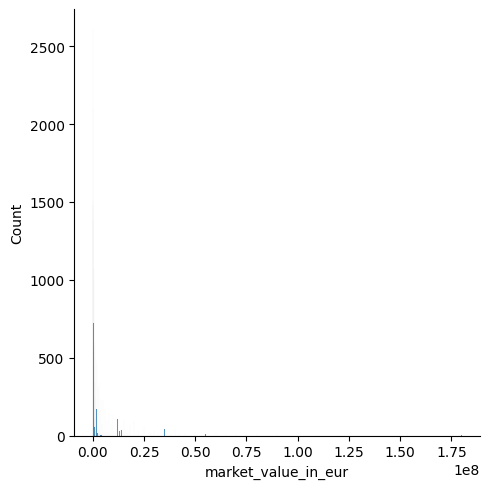

In [195]:
sns.displot(players_df['market_value_in_eur']);

Due to the existance of outliers within the players 'market_value_in_eur' variable, the graphic above is difficult to interpret. We will recreate the visual and exclude the outliers.

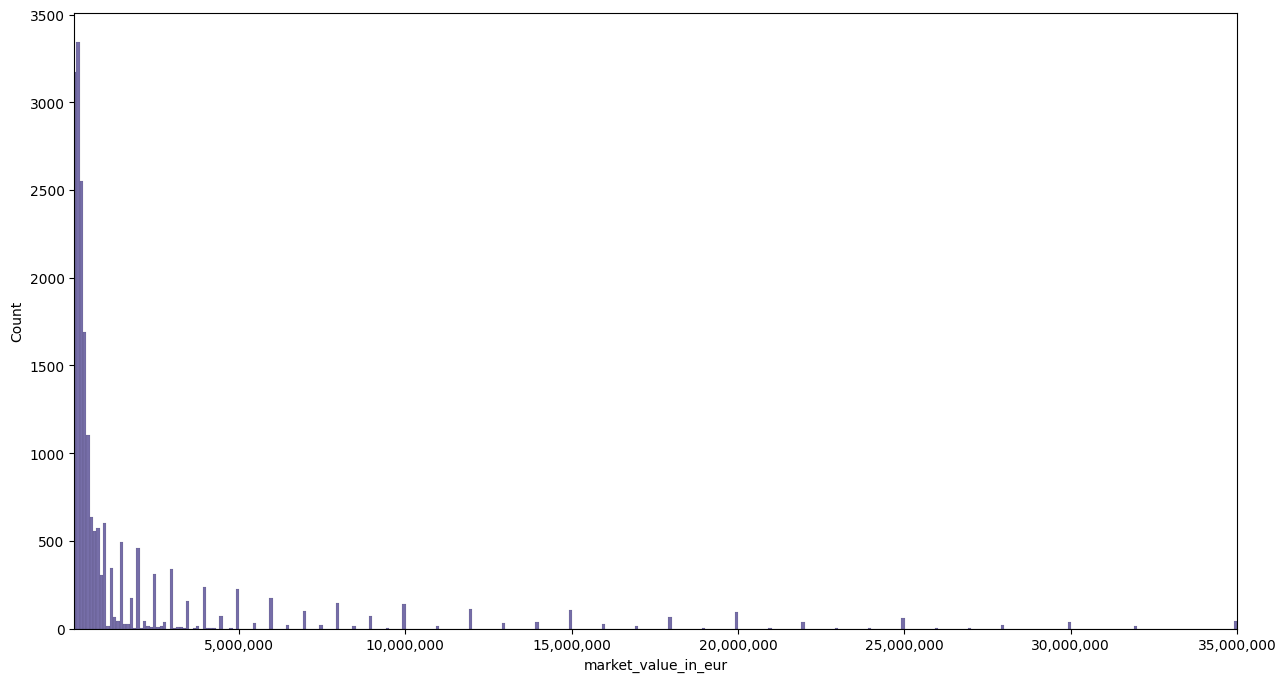

In [196]:
import matplotlib.ticker as ticker

filtered_market_value_df = players_df.dropna(subset=['market_value_in_eur'])

lower_bound, upper_bound = np.percentile(filtered_market_value_df["market_value_in_eur"], [5, 99])
plt.figure(figsize=(15, 8))
sns.histplot(filtered_market_value_df['market_value_in_eur'], bins = 1800, color="#483D8B")
plt.xlim(lower_bound, upper_bound)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

Removing outliersin the 99th percentile (above) and 95th percentile (below) allows for the creation of a more readable and informative graphic. We find that the data is not normally distributed. The graphs indicate a right skew distribution which is to be expected for the data it represents in player market values (ASQ, 2019). for the large volume of players represented in the dataset, only an elite few are ever estimated to be worth over 35 million. The average player value, excluding outliers, is aroun#d 3.5 million euro.

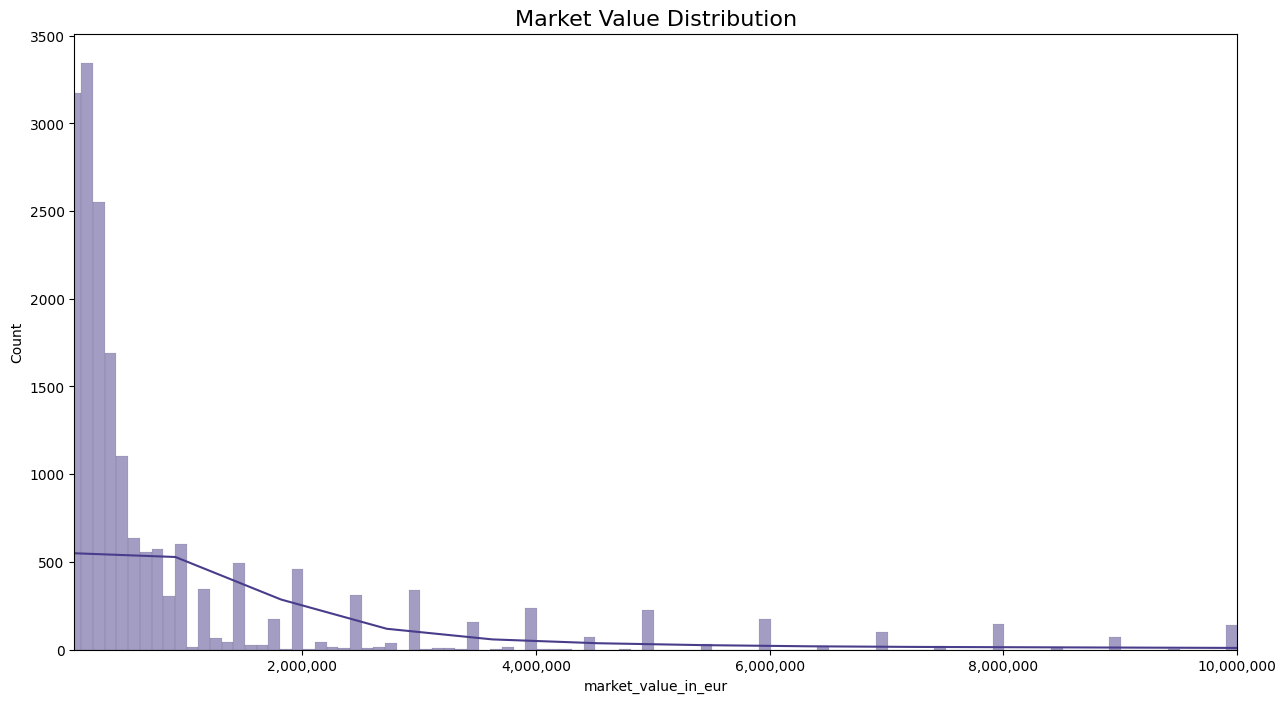

In [197]:

filtered_market_value_df = players_df.dropna(subset=['market_value_in_eur'])

lower_bound, upper_bound = np.percentile(filtered_market_value_df["market_value_in_eur"], [5, 95])
plt.figure(figsize=(15, 8))
sns.histplot(filtered_market_value_df['market_value_in_eur'], bins = 1800, color="#483D8B", kde = True)
plt.xlim(lower_bound, upper_bound)
plt.title("Market Value Distribution", fontsize=16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

In [198]:
# Insufficient memory resources to run the following block

In [199]:
# filtered_market_value_df = players_df.dropna(subset=['market_value_in_eur'])

# lower_bound, upper_bound = np.percentile(filtered_market_value_df["market_value_in_eur"], [5, 95])
# plt.figure(figsize=(15, 8))
# sns.histplot(filtered_market_value_df["market_value_in_eur"], color="#483D8B", binwidth = 0.05, binwidth=1, kde=True)
# plt.xlabel("Market Value (in euros)", fontsize=13)
# plt.ylabel("Frequency", fontsize=13)
# plt.title("Market Value Distribution", fontsize=16)
# plt.grid(True)
# plt.xlim(lower_bound, upper_bound)
# plt.show()

#### Applying transformations to the target variable

In [200]:
# This test outputs a "p-value". The higher this p-value is the closer the distribution is to normal (Kalyvas, 2024).
normaltest(filtered_market_value_df.market_value_in_eur.values)

NormaltestResult(statistic=27658.83203172662, pvalue=0.0)

Again, by calculating the p-value, we gain insght into the distribution of the data. A large p-value implies that sample scores are more aligned or similar to the population score. (Saxena, 2020) A low p-value as in our case, indicates the data does not follow a normal distribution. Linear regression assumes a normally distributed residuals which can be aided by transforming our target variable in 'market_value_in_euro'(Kalyvas, 2024).

We will now apply 3 transformations in Log, Square Root and Box Cox to convert our data to a normal distribution (Marsja, 2020).

Log:
NormaltestResult(statistic=1252.5438254913688, pvalue=1.0317254023884278e-272)




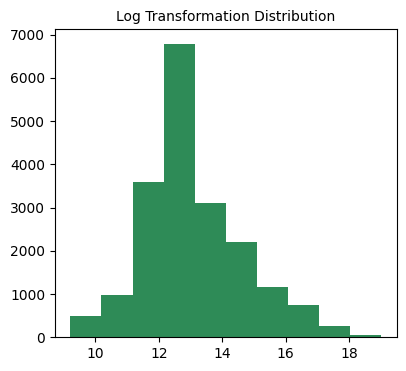

In [201]:
# Log Transformation
plt.figure(figsize=(15,4))
log_market_value_in_eur = np.log(filtered_market_value_df['market_value_in_eur'])
plt.subplot(1,3,1)
plt.hist(log_market_value_in_eur, color="#2E8B57")
plt.title("Log Transformation Distribution", fontsize=10)
print('Log:')
print(normaltest(log_market_value_in_eur.values))
print('\n')

Square Root:
NormaltestResult(statistic=14414.30890988147, pvalue=0.0)




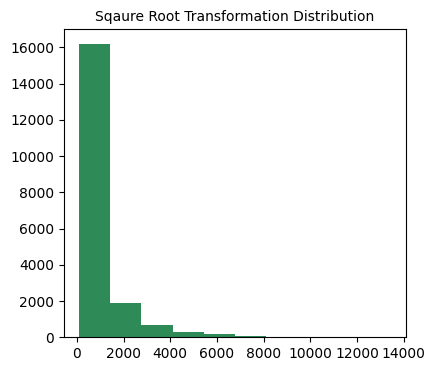

In [202]:
# Sqaure Root Transformation
plt.figure(figsize=(15,4))
sqrt_market_value_in_eur = np.sqrt(filtered_market_value_df.market_value_in_eur)
plt.subplot(1,3,2)
plt.hist(sqrt_market_value_in_eur, color="#2E8B57")
plt.title("Sqaure Root Transformation Distribution", fontsize=10)
print('Square Root:')
print(normaltest(sqrt_market_value_in_eur.values))
print('\n')

Boxcox: 
NormaltestResult(statistic=2.3723790757931993, pvalue=0.3053826990611954)


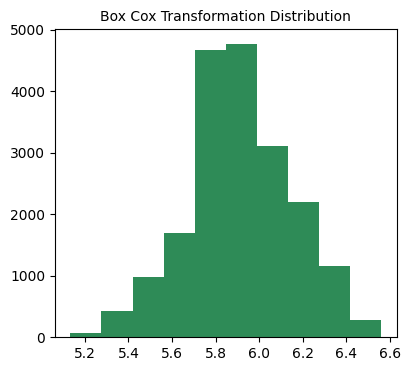

In [203]:
# Box Cox Transformation
plt.figure(figsize=(15,4))

bc_result = boxcox(filtered_market_value_df.market_value_in_eur)
boxcox_market_value_in_eur = bc_result[0]
lam = bc_result[1]
plt.subplot(1,3,3)
plt.hist(boxcox_market_value_in_eur, color="#2E8B57")
plt.title("Box Cox Transformation Distribution", fontsize=10)
print('Boxcox: ')
print(normaltest(pd.Series(boxcox_market_value_in_eur).values))

We find the most suitable transformation for the given data for a normal distribution, is a Log transformation with the highest p-value at 1.0317254023884278e-272.

### Addressing the Missing values for 'market_value_in_eur'

As the  'market_value_in_eur' follows a right skewed distribution due to some extreme outliers, imputing missing values with just the mean may not be the most suitable option. We will apply thre different imputation methods below, the first being a more robust estimate of the mean, the second a robust estimate of the medium which is less sensitive to the outliers, and the third being using the KNNImputer which does not assume a normal distribution and is less sensistive to outliers. 

In [204]:
players_df_median = players_df.copy()

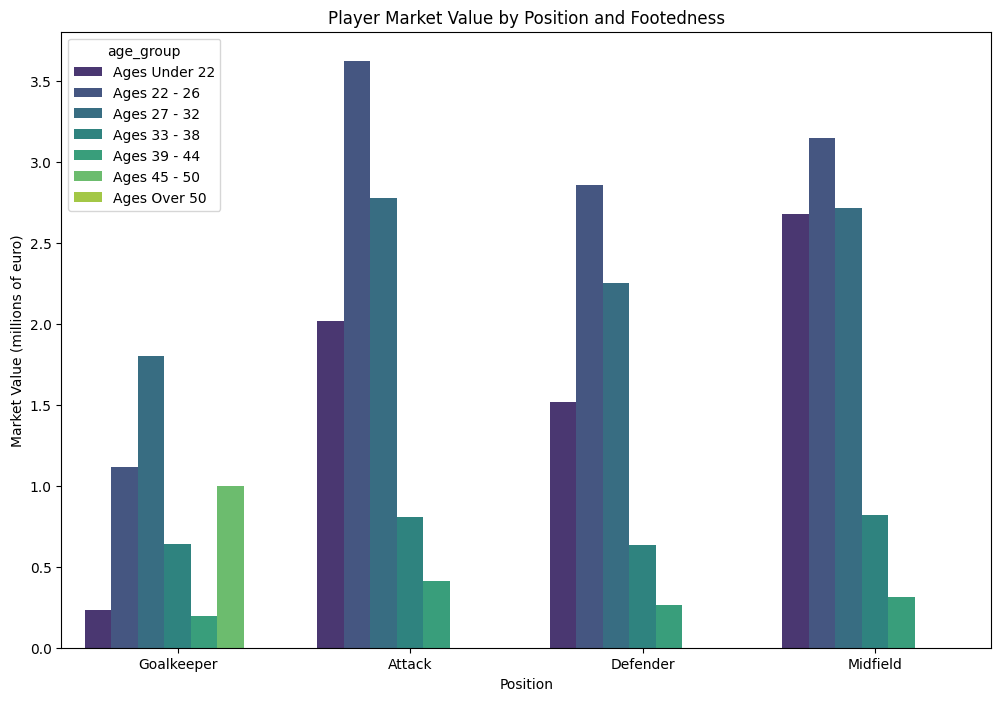

In [205]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'position' , y=players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38', 'Ages 39 - 44', 'Ages 45 - 50', 'Ages Over 50'], data = players_df, palette = "viridis", ci=0)
plt.title("Player Market Value by Position and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Position')
#plt.xticks(rotation = 'vertical')
plt.show()

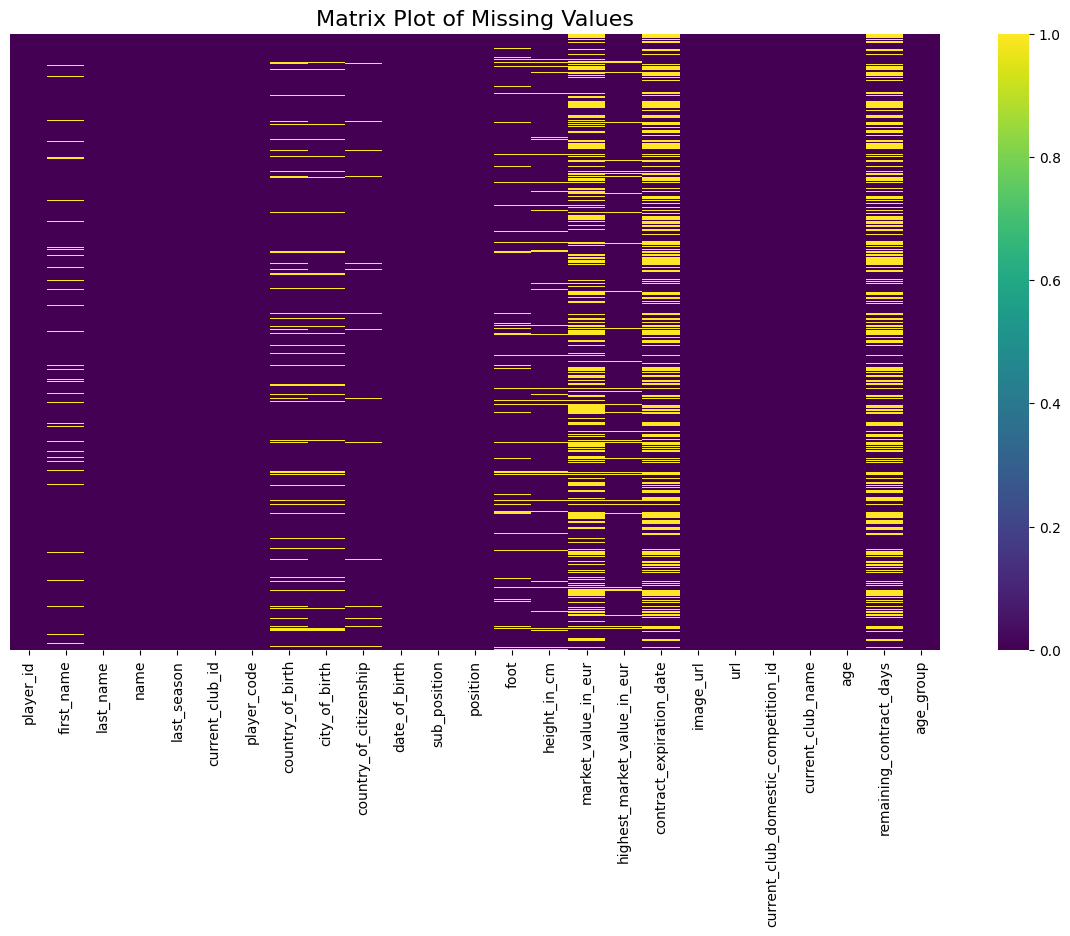

In [208]:
plt.figure(figsize=(15, 8))
sns.heatmap(players_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.title("Matrix Plot of Missing Values", fontsize=16);

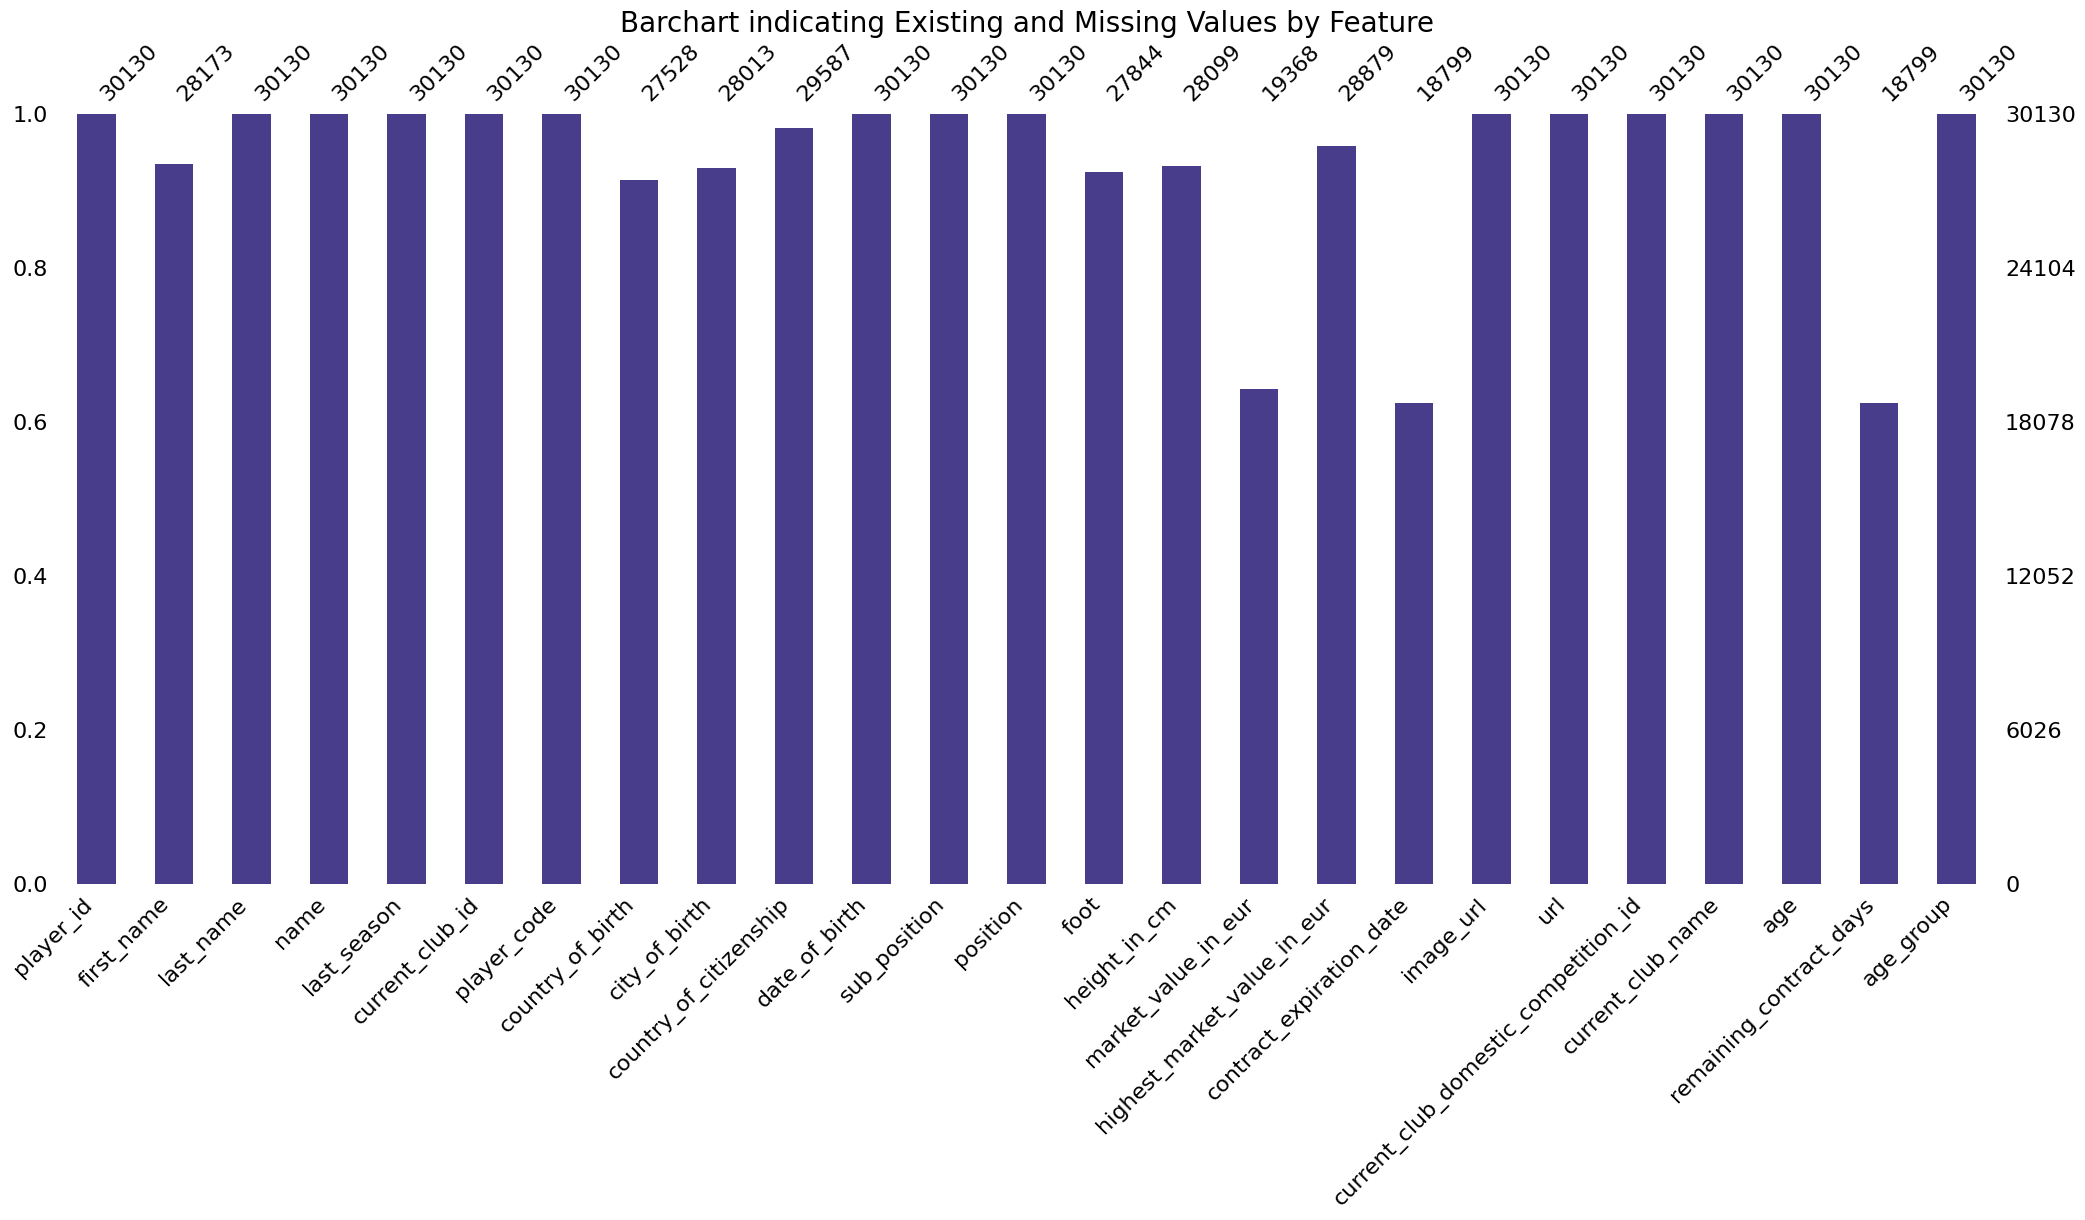

In [211]:
msno.bar(players_df, color = "#483D8B")
plt.title("Barchart indicating Existing and Missing Values by Feature", fontsize=20);

In [ ]:
players_df['market_value_in_eur'].isnull().sum()

### <span style="color:Teal"> Method 1 : Robust Mean</span>

In [ ]:
players_df['market_value_in_eur'].describe()

In [ ]:
players_df.groupby(['position'])['market_value_in_eur'].mean()

In [ ]:
# Calculating the mean market values based on position and age category
mean_values = players_df.groupby(['position', 'age_group'])['market_value_in_eur'].mean().reset_index()

# Displaying the mean values
print(mean_values)

In [ ]:
# Writing a function of conditional statements for imputing the mean market values based on position and age category
def impute_market_value(cols):
    market_value_in_eur = cols[0]
    position = cols[1]
    age_group = cols[2]
    
    if pd.isnull(market_value_in_eur):

        if position == 'Attack':
            if age_group == 'Ages 22 - 26':
                return 3.761589e+06
            elif age_group == 'Ages 27 - 32':
                return 2.519384e+06
            elif age_group == 'Ages 33 - 38':
                return 7.900107e+05
            elif age_group == 'Ages 39 - 44':
                return 4.437255e+05
            elif age_group == 'Ages Under 22':
                return 2.209577e+06
            else:
                return 2.236328e+06
                
        elif position == 'Defender':
            if age_group == 'Ages 22 - 26':
                return 2.989714e+06
            elif age_group == 'Ages 27 - 32':
                return 2.109582e+06
            elif age_group == 'Ages 33 - 38':
                return 5.224117e+05
            elif age_group == 'Ages 39 - 44':
                return 2.053261e+05
            elif age_group == 'Ages Under 22':
                return 1.579725e+06
            else:
                return 2.236328e+06
            
        elif position == 'Goalkeeper':
            if age_group == 'Ages 22 - 26':
                return 1.093724e+06
            elif age_group == 'Ages 27 - 32':
                return 1.836525e+06
            elif age_group == 'Ages 33 - 38':
                return 6.415633e+05
            elif age_group == 'Ages 39 - 44':
                return 1.860000e+05
            elif age_group == 'Ages 45 - 50':
                return 1.000000e+06
            elif age_group == 'Ages Under 22':
                return 3.466327e+05
            else:
                return 2.236328e+06
            
        elif position == 'Midfield':
            if age_group == 'Ages 22 - 26':
                return 3.168564e+06
            elif age_group == 'Ages 27 - 32':
                return 2.641277e+06
            elif age_group == 'Ages 33 - 38':
                return 7.158922e+05
            elif age_group == 'Ages 39 - 44':
                return 1.768868e+05
            elif age_group == 'Ages Under 22':
                return 2.715097e+06
            else:
                return 2.236328e+06

        else:
            return 2.236328e+06

    else:
        return market_value_in_eur

In [ ]:
# Applying the function to the players df
players_df['market_value_in_eur'] = players_df[['market_value_in_eur','position','age_group']].apply(impute_market_value,axis=1)

In [ ]:
sns.heatmap(players_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### <span style="color:Teal"> Method 2 : Robust Median</span>

In [ ]:
players_df_median.groupby(['position'])['market_value_in_eur'].median()

In [ ]:
# Calculating the mean market values based on position and age category
median_values = players_df_median.groupby(['position', 'age_group'])['market_value_in_eur'].median().reset_index()

# Displaying the mean values
print(median_values)

In [ ]:
# Writing a function of conditional statements for imputing the mean market values based on position and age category
def impute_market_value_median(cols):
    market_value_in_eur = cols[0]
    position = cols[1]
    age_group = cols[2]
    
    if pd.isnull(market_value_in_eur):

        if position == 'Attack':
            if age_group == 'Ages 22 - 26':
                return 450000.00
            elif age_group == 'Ages 27 - 32':
                return 500000.00
            elif age_group == 'Ages 33 - 38':
                return 250000.00
            elif age_group == 'Ages 39 - 44':
                return 100000.00
            elif age_group == 'Ages Under 22':
                return 300000.00
            else:
                return 400000.00
                
        elif position == 'Defender':
            if age_group == 'Ages 22 - 26':
                return 400000.00
            elif age_group == 'Ages 27 - 32':
                return 500000.00
            elif age_group == 'Ages 33 - 38':
                return 250000.00
            elif age_group == 'Ages 39 - 44':
                return 100000.00
            elif age_group == 'Ages Under 22':
                return 200000.00
            else:
                return 400000.00
            
        elif position == 'Goalkeeper':
            if age_group == 'Ages 22 - 26':
                return 200000.00
            elif age_group == 'Ages 27 - 32':
                return 350000.00
            elif age_group == 'Ages 33 - 38':
                return 250000.00
            elif age_group == 'Ages 39 - 44':
                return 100000.00
            elif age_group == 'Ages 45 - 50':
                return 1000000.00
            elif age_group == 'Ages Under 22':
                return 100000.00
            else:
                return 200000.00
            
        elif position == 'Midfield':
            if age_group == 'Ages 22 - 26':
                return 400000.00
            elif age_group == 'Ages 27 - 32':
                return 500000.00
            elif age_group == 'Ages 33 - 38':
                return 300000.00
            elif age_group == 'Ages 39 - 44':
                return 100000.00
            elif age_group == 'Ages Under 22':
                return 250000.00
            else:
                return 400000.00

        else:
            return 350000.00

    else:
        return market_value_in_eur

In [ ]:
# Applying the function 
players_df_median['market_value_in_eur'] = players_df_median[['market_value_in_eur','position','age_group']].apply(impute_market_value_median,axis=1)

In [ ]:
sns.heatmap(players_df_median.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
players_df_median['market_value_in_eur'].isnull().sum()

### <span style="color:Teal"> Method 3 : Imputing using KNNImputer</span>

In [ ]:
players_df_KNN['position'].value_counts()

In [ ]:
players_df_KNN['sub_position'].value_counts()

In [ ]:
players_df_KNN['position'].replace('Missing', np.nan, inplace=True)

In [ ]:
players_df_KNN['position'].isnull().sum()

In [ ]:
players_df_KNN['sub_position'].isnull().sum()

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(players_df_KNN.isnull(), yticklabels=False,cbar=False, cmap='viridis')

plt.title("Matrix Plot of Missing Values", fontsize=16);

At a glance, it would appear that there is a pattern between missing value for position and sub_position. They may be considered MNAR. There is a pattern between contract_expiration_date and remaining_contract_days aswell, but this is expected as one is derived from the other.

In [ ]:
players_df_KNN.info()

#### Ordinal Encoding using mapping for Categorical Variables

In [ ]:
players_df_KNN['position'].unique()

In [ ]:
players_df_KNN['position_map'] = players_df_KNN.position.map({'Goalkeeper' : 0, 'Attack' : 1, 'Defender' : 2, 'Midfield' : 3, })

In [ ]:
players_df_KNN[['position', 'position_map']].head()

In [ ]:
players_df_KNN['sub_position'].unique()

In [ ]:
players_df_KNN['sub_position_map'] = players_df_KNN.sub_position.map({'Goalkeeper' : 0, 'Left Winger' : 1, 'Centre-Back' : 2, 'Right Winger' : 3,
       'Right Midfield' : 4, 'Right-Back' : 5, 'Central Midfield' : 6,
       'Defensive Midfield' : 7, 'Centre-Forward' : 8, 'Attacking Midfield' : 9,
       'Left-Back' : 10, 'Left Midfield' : 11, 'Second Striker' : 12})

In [ ]:
players_df_KNN[['sub_position', 'sub_position_map']].head(10)

In [ ]:
players_df_KNN['foot'].unique()

In [ ]:
players_df_KNN['foot_map'] = players_df_KNN.foot.map({'right' : 0, 'left' : 1, 'both' : 2})

In [ ]:
players_df_KNN[['foot', 'foot_map']].head(10)

In [ ]:
players_df_KNN['current_club_domestic_competition_id'].unique()

In [ ]:
players_df_KNN['current_club_domestic_competition_id_map'] = players_df_KNN.current_club_domestic_competition_id.map({'L1' : 0, 'ES1' : 1, 'GB1' : 2, 'NL1' : 3, 'SC1' : 4, 'FR1' : 5, 'TR1' : 6, 'GR1' : 7, 'IT1' : 8,
       'RU1' : 9, 'PO1' : 10, 'BE1' : 11, 'UKR1' : 12, 'DK1' : 13})

In [ ]:
players_df_KNN[['current_club_domestic_competition_id', 'current_club_domestic_competition_id_map']].head(20)

In [ ]:
players_df_KNN.info()

#### Applying KNNImputer

In [ ]:
# Instantiating KNN Imputer object
imputer = KNNImputer(n_neighbors=10) 

In [ ]:
# Imputing missing value
imputed_data = imputer.fit_transform(players_df_KNN[['player_id', 'last_season', 'current_club_id', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'age', 'remaining_contract_days', 'position_map', 'sub_position_map', 'foot_map', 'current_club_domestic_competition_id_map']])

#### Replacing columns that have been Imputed

In [ ]:
# Converting imputed_data back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=['player_id', 'last_season', 'current_club_id', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'age', 'remaining_contract_days', 'position_map', 'sub_position_map', 'foot_map', 'current_club_domestic_competition_id_map'])


In [ ]:
# Dropping columns we don't want to or have already updated
imputed_df.drop(columns=['player_id', 'last_season', 'current_club_id', 'age', 'current_club_domestic_competition_id_map'], inplace=True)

In [ ]:
players_df_KNN[['height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'remaining_contract_days', 'position_map', 'sub_position_map', 'foot_map']] = imputed_df

#### Converting back to original Categories

In [ ]:
mapping_columns = ['position_map', 'sub_position_map', 'foot_map']

# Rounding the selected mapping columns to the nearest integer
imputed_df[mapping_columns] = imputed_df[mapping_columns].round().astype(int)

In [ ]:
players_df_KNN['position'] = imputed_df['position_map'].map({0: 'Goalkeeper', 1: 'Attack', 2: 'Defender', 3: 'Midfield'})

In [ ]:
players_df_KNN['sub_position'] = imputed_df['sub_position_map'].map({0: 'Goalkeeper', 1: 'Left Winger', 2: 'Centre-Back', 3: 'Right Winger',
                                                                   4: 'Right Midfield', 5: 'Right-Back', 6: 'Central Midfield',
                                                                   7: 'Defensive Midfield', 8: 'Centre-Forward', 9: 'Attacking Midfield',
                                                                   10: 'Left-Back', 11: 'Left Midfield', 12: 'Second Striker'})


In [ ]:
players_df_KNN['foot'] = imputed_df['foot_map'].map({0: 'right', 1: 'left', 2: 'both'})

In [ ]:
# Dropping columns we no longer require following mapping
players_df_KNN.drop(columns=[ 'position_map', 'sub_position_map', 'foot_map', 'current_club_domestic_competition_id_map'], inplace=True)

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(players_df_KNN.isnull(), yticklabels=False,cbar=False, cmap='viridis')

plt.title("Matrix Plot of Missing Values", fontsize=16);

In [ ]:
players_df_KNN.info()

In [ ]:
players_df_KNN['market_value_in_eur'].isnull().sum()

### Addressing the Missing values for 'highest_market_value_in_eur'

We will eventually be dropping this feature as it will not be used ML modelling as it will leak insghts into our target variable. Hence we will only impute missing values for one dataframe for conducting EDA with Graphics.

In [ ]:
players_df['highest_market_value_in_eur'].value_counts()

In [ ]:
players_df['highest_market_value_in_eur'].isnull().sum()

In [ ]:
players_df['highest_market_value_in_eur'].describe()

In [ ]:
# Calculating the mean market values based on position and age category
mean_highest_values = players_df.groupby(['position', 'age_group'])['highest_market_value_in_eur'].mean().reset_index()

# Displaying the mean values
print(mean_highest_values)

In [ ]:
# Writing a function of conditional statements for imputing the mean market values based on position and age category
def impute_highest_market_value(cols):
    highest_market_value_in_eur = cols[0]
    position = cols[1]
    age_group = cols[2]
    
    if pd.isnull(highest_market_value_in_eur):

        if position == 'Attack':
            if age_group == 'Ages 22 - 26':
                return 4.223364e+06
            elif age_group == 'Ages 27 - 32':
                return 4.297336e+06
            elif age_group == 'Ages 33 - 38':
                return 4.713043e+06
            elif age_group == 'Ages 39 - 44':
                return 5.758007e+06
            elif age_group == 'Ages 45 - 50':
                return 8.016406e+06
            elif age_group == 'Ages Under 22':
                return 2.392311e+06
            else:
                return 3.582088e+06
                
        elif position == 'Defender':
            if age_group == 'Ages 22 - 26':
                return 3.183876e+06
            elif age_group == 'Ages 27 - 32':
                return 3.314468e+06
            elif age_group == 'Ages 33 - 38':
                return 3.277274e+06
            elif age_group == 'Ages 39 - 44':
                return 3.810223e+06
            elif age_group == 'Ages 45 - 50':
                return 4.756200e+06
            elif age_group == 'Ages Under 22':
                return 1.590434e+06
            else:
                return 3.582088e+06
            
        elif position == 'Goalkeeper':
            if age_group == 'Ages 22 - 26':
                return 1.129222e+06
            elif age_group == 'Ages 27 - 32':
                return 2.288247e+06
            elif age_group == 'Ages 33 - 38':
                return 2.477691e+06
            elif age_group == 'Ages 39 - 44':
                return 2.843714e+06
            elif age_group == 'Ages 45 - 50':
                return 2.665569e+06
            elif age_group == 'Ages Over 50':
                return 2.066667e+06
            elif age_group == 'Ages Under 22':
                return 3.469281e+05
            else:
                return 3.582088e+06
            
        elif position == 'Midfield':
            if age_group == 'Ages 22 - 26':
                return 3.344822e+06
            elif age_group == 'Ages 27 - 32':
                return 4.022066e+06
            elif age_group == 'Ages 33 - 38':
                return 4.301016e+06
            elif age_group == 'Ages 39 - 44':
                return 4.890127e+06
            elif age_group == 'Ages 45 - 50':
                return 6.341667e+06
            elif age_group == 'Ages Under 22':
                return 2.716215e+06
            else:
                return 3.582088e+06

        else:
            return 3.582088e+06

    else:
        return highest_market_value_in_eur

In [ ]:
# Applying the impute_highest_value_function to the players df
players_df['highest_market_value_in_eur'] = players_df[['highest_market_value_in_eur','position','age_group']].apply(impute_highest_market_value,axis=1)

In [ ]:
sns.heatmap(players_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
players_df['highest_market_value_in_eur'].isnull().sum()

In [ ]:
#Extracting the year from datetime and storing it to a new fetaure column 'year'
#players_df['year']=players_df['datetime'].dt.year

### Exploring the Older players within the data

In [ ]:
older_players_df = players_df[(players_df['age_group'] == 'Ages 45 - 50') | (players_df['age_group']== 'Ages Over 50')]

In [ ]:
older_players_df.head(50)

In [ ]:
older_players_df_sorted_lastyear = older_players_df.sort_values("last_season", ascending = False)

In [ ]:
older_players_df_sorted_lastyear.head(50)

In [ ]:
older_players_df_sorted_lastyear.shape

In [ ]:
last_season_2021_players_df = players_df[players_df['last_season'] <= 2021]

In [ ]:
last_season_2021_players_df.shape

In [ ]:
last_season_2021_players_df.head()

In [ ]:
players_df.shape

After viewing the data above it is apparent that the datasets still contain data of retired players(last_season prior to 2022)  whos market values and ages are innacurate based on their current age, status and the current market. Retaining these entries will produce false descriptive statistics, introduce bias and lead to innaccurate model player valuations results. A new dataframe of current players, i.e excluding those who retired in or before 2022 is created for descriptive analysis.

In [ ]:
current_players_df = players_df[players_df['last_season'] >= 2022]

In [ ]:
current_players_df.shape

In [ ]:
appearances_df.info()

In [ ]:
# Creating a Feature for 'year' from the 'date' column
appearances_df['datetime']=pd.to_datetime(appearances_df['date'], format="%Y-%m-%d")
appearances_df['year']=appearances_df['datetime'].dt.year

In [ ]:
appearances_df.info()

In [ ]:
accumulated_stats = appearances_df.groupby(['player_id', 'year']).agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum'
}).reset_index()

In [ ]:
accumulated_stats.info()

In [ ]:
accumulated_stats.nunique()

In [ ]:
current_players_df.info()

In [ ]:
current_players_df.nunique()

In [ ]:
current_players_df_with_stats = current_players_df.merge(accumulated_stats, left_on='player_id', right_on='player_id')

In [ ]:
#current_players_df_with_stats = current_players_df.merge(accumulated_stats, on='player_id', how='left')

In [ ]:
current_players_df_with_stats.info()

In [ ]:
current_players_df_with_stats.nunique()

#  <span style="color:SeaGreen">  Merging Required Datasets </span>

### <span style="color:Teal"> First Dataset of All Players</span>

In [ ]:
# Creating a copy of the players_df
merged_players_df = players_df.copy()

# Merging the games and appearances df's   
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')

# Selecting the last five seasons for gathering stats
seasons = [2019, 2020, 2021, 2022, 2023]

# Creating and initialising a total column for each statistics
for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
    merged_players_df[stat + '_total'] = 0

# Creating a function to collate player stats
def player_stats(player_id, season, df):
    df = df[df['player_id'] == player_id]
    df = df[df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df

# Iterating through players
for index in merged_players_df.index:
    id = merged_players_df.loc[index][0]
    name = merged_players_df.loc[index][1]
    
    # Iterating through seasons
    for season in seasons:
        stats = player_stats(id, season, games_and_appearances_df)
        try:
            for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
                merged_players_df.at[index, stat + '_{}'.format(season)] = stats[stat][0]
                merged_players_df.at[index, stat + '_total'] += stats[stat][0]
        except:
            pass

print('Player and statistics data merged.')
print(merged_players_df.info())

In [ ]:
merged_players_df.nunique()

### <span style="color:Teal"> Second Dataset of all Current Players</span>

In [ ]:
# Creating a copy of the players_df
merged_current_players_df = current_players_df.copy()

# Merging the games and appearances df's   
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')

# Selecting the last five seasons for gathering stats
seasons = [2019, 2020, 2021, 2022, 2023]

# Creating and initialising a total column for each statistics
for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
    merged_current_players_df[stat + '_total'] = 0

# Creating a function to collate player stats
def player_stats(player_id, season, df):
    df = df[df['player_id'] == player_id]
    df = df[df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df

# Iterating through players
for index in merged_current_players_df.index:
    id = merged_current_players_df.loc[index][0]
    name = merged_current_players_df.loc[index][1]
    
    # Iterating through seasons
    for season in seasons:
        stats = player_stats(id, season, games_and_appearances_df)
        try:
            for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
                merged_current_players_df.at[index, stat + '_{}'.format(season)] = stats[stat][0]
                merged_current_players_df.at[index, stat + '_total'] += stats[stat][0]
        except:
            pass

print('Player and statistics data merged.')
print(merged_current_players_df.info())

In [ ]:
merged_current_players_df.nunique()

### <span style="color:Teal"> Third Dataset of Current Players following Imputation using Median</span>

In [ ]:
current_players_df_median = players_df_median[players_df_median['last_season'] >= 2022]

# Creating a copy of the players_df
merged_current_players_df_median = current_players_df_median.copy()

# Merging the games and appearances df's   
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')

# Selecting the last five seasons for gathering stats
seasons = [2019, 2020, 2021, 2022, 2023]

# Creating and initialising a total column for each statistics
for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
    merged_current_players_df_median[stat + '_total'] = 0

# Creating a function to collate player stats
def player_stats(player_id, season, df):
    df = df[df['player_id'] == player_id]
    df = df[df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df

# Iterating through players
for index in merged_current_players_df_median.index:
    id = merged_current_players_df_median.loc[index][0]
    name = merged_current_players_df_median.loc[index][1]
    
    # Iterating through seasons
    for season in seasons:
        stats = player_stats(id, season, games_and_appearances_df)
        try:
            for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
                merged_current_players_df_median.at[index, stat + '_{}'.format(season)] = stats[stat][0]
                merged_current_players_df_median.at[index, stat + '_total'] += stats[stat][0]
        except:
            pass

print('Player and statistics data merged.')
print(merged_current_players_df_median.info())

### <span style="color:Teal"> Fourth Dataset of all Current Players following Imputation using KNNImputer</span>

In [ ]:
current_players_df_KNN = players_df_KNN[players_df_KNN['last_season'] >= 2022]

# Creating a copy of the players_df
merged_current_players_df_KNN = current_players_df_KNN.copy()

# Merging the games and appearances df's   
games_and_appearances_df = appearances_df.merge(games_df, on=['game_id'], how='left')

# Selecting the last five seasons for gathering stats
seasons = [2019, 2020, 2021, 2022, 2023]

# Creating and initialising a total column for each statistics
for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
    merged_current_players_df_KNN[stat + '_total'] = 0

# Creating a function to collate player stats
def player_stats(player_id, season, df):
    df = df[df['player_id'] == player_id]
    df = df[df['season'] == season]    
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df    
    else:       
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id'] 
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id'] 
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique', 
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df

# Iterating through players
for index in merged_current_players_df_KNN.index:
    id = merged_current_players_df_KNN.loc[index][0]
    name = merged_current_players_df_KNN.loc[index][1]
    
    # Iterating through seasons
    for season in seasons:
        stats = player_stats(id, season, games_and_appearances_df)
        try:
            for stat in ['games', 'goals', 'assists', 'minutes_played', 'goals_for', 'goals_against', 'clean_sheet', 'yellow_cards', 'red_cards']:
                merged_current_players_df_KNN.at[index, stat + '_{}'.format(season)] = stats[stat][0]
                merged_current_players_df_KNN.at[index, stat + '_total'] += stats[stat][0]
        except:
            pass

print('Player and statistics data merged.')
print(merged_current_players_df_KNN.info())

# <span style="color:SeaGreen"> New Merged Dataset :</span><span style="color:DarkSlateBlue">Characterising and Preprocessing for EDA with Graphics </span>


In [ ]:
merged_current_players_df.info()

Nominal Data (Qualitative and Categorical) Features:
   
    player_id
    first_name
    last_name
    name
    current_club_id
    player_code
    country_of_birth
    city_of_birth
    country_of_citizenship
    date_of_birth
    sub_position
    position
    foot
    contract_expiration_date
    image_url
    url
    current_club_domestic_competition_id
    current_club_name
    age_group
    
Ordinal Data (Categorical with order) Features:

    last_season (although interval data, is never represent as a negative)
    date_of_birth (although interval data, is never represent as a negative)
    contract_expiration_date (although interval data, is never represent as a negative)

Ratio Data (Quantitative, true zero) Features:

    height_in_cm
    market_value_in_eur
    highest_market_value_in_eur
    age
    remaining_contract_days
    games_2019
    games_2020
    games_2021
    games_2022
    games_2023

Determining the data types is important for cleaning, processing and imputing values within them in preperation for  further analysis and ML modelling.

In [ ]:
print('Unique values in object type features: \n')
for feature in merged_current_players_df:
        print (f'Feature name: {feature}')
        print('\n')
        print('Number of Unique values: ', merged_current_players_df[feature].nunique())
        print('\n')
        print('Unique values: ', merged_current_players_df[feature].unique())
        print('_________________________________________________________________________________________')
        print('\n')

In [ ]:
categorical_df = merged_current_players_df[['sub_position', 'position', 'foot', 'current_club_domestic_competition_id', 'date_of_birth', 'age_group']].copy()
categorical_df.info()

In [ ]:
quantitative_df = merged_current_players_df[['height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'age', 'remaining_contract_days', 'games_2019', 'games_2020', 'games_2021', 'games_2022', 'games_2023']].copy()
quantitative_df.info()

#  <span style="color:SeaGreen">  EDA :</span><span style="color:DarkSlateBlue"> Descriptive Statistics</span>

### <span style="color:Teal"> Numerical Features</span>   

In [ ]:
merged_current_players_df.describe()

By leveraging Pandas 'describe' function, we gain insights into the central tendency, spread (or dispersion) and potential outliers for each variable within our data. The central tendency is identifiable by the mean (average), 50% (medium) or mode for non numerical features. Depending on the data type and influence of outliers, these values may be used for data imputation. Measures of spread include the range which can be computed by the difference between the max and min values, and the interquartile range which is equivalent to the difference between the third and first quartiles, and the standard deviation (std) which indicates how spread out the data is around the mean. Outliers may be identified through the min and max values and percentiles, although a box or violin plots will provide more clarity.

Viewing the statistical description of numerical data type features for current players, we find:
    
    The shortest player is 160cm tall while the tallest is 206cm. Both outliers.
    The average height is 182.67cm.
    The least valued players are worth 10000 euro.
    With a Standard deviation of 9807984.55 and mean of 3885464.87, the highest valued player at 180 million is too, a clear outlier.
    The oldest currently playing player/s is 43 and youngest 16 years old.
    The average and most games played for 2023 is considerable lower than other years. This is to be expected if the last season recored is 2022-2023, having ended in May of 2023.
    

### <span style="color:Teal"> Object Data Type Features</span>

In [ ]:
merged_current_players_df.describe(include = 'object')

Viewing the statistical description of object data type features for current players, we find:
    
    The most common first name is Ivan.
    The most common last name is Garcia.
    The most common name is Paulinho.
    France is the most frequently occuring Country of Birth.
    London is the most frequently occuring City of Birth.
    Most current player have Spanish citizenship.
    Defenders are the most represented position with Centre back being the sub_position.
    The Turkish league is the most represented league and PAS lamia 1964 the most represented tweam.
    Most players fall in the 22-26 age group.
    There are 152 different countries of birth and 4000 different cities.

#  <span style="color:SeaGreen">  EDA :</span><span style="color:DarkSlateBlue"> Univariate with Graphics </span>

## <span style="color:YellowGreen"> Visualising the Frequency Distribution for Variables using Histograms</span>

Frequency Distribution indicates how often each disparate value occurs in a dataset. Histograms are the most popularly used and effective graphs for this purpose as they communicate the distribution of data quickly and easily, often due to the beholders familiarity with them. While Pandas 'describe' function provides a non-graphical statistical description of the data, histograms provide a visual of the central tendency, spread and potential outliers. The shape of the histogram can show the type of distribution, whether normal(Gaussian/ bell shaped), bimodal, skewed or other. This aids in identifying patterns and trends within the data. The location of the peaks can indicate the central tendency, the spread of the bars can indicate the dispersion of the data, while sparse bars at the extremes can indicate the presence of outliers (ASQ, 2019). Visualising the data in this way helps in understanding our data and aids in more informed decision making down the line.

### <span style="color:Teal"> Categorical Features</span>

In [ ]:
for feature in categorical_df:
    plt.figure(figsize=(15, 8))
    sns.histplot(data = categorical_df, x = categorical_df[feature], color = "#2E8B57")
    plt.xlabel(feature, fontsize=13)
    plt.ylabel("Frequency", fontsize=13)
    plt.xticks(rotation = 45)
    plt.title( f"{feature} Frequency Distribution" , fontsize=16)
    plt.grid(True)
    plt.show()

For nominal categorical data like above, the concepts of central tendency, spread and skew have no meaning (Chapter 4 Exploratory Data Analysis, n.d.). We can however have a closer look at the distribution of values. The Histogram aids in visualising and confirming earlier findings when viewing the statistical distribution using Pandas Describe Function.
Centre back is the most frequent sub positon and defender the most common position. We also find that left midfield, second strikers and right midfieders are scarce. So too for both footed plaers with the majority being right foot.

### <span style="color:Teal"> Quantitative Features</span>

In [ ]:
# for feature in quantitative_df:
#     plt.figure(figsize=(15, 8))
#     sns.histplot(data = quantitative_df, x = quantitative_df[feature], color = "#483D8B", kde = True)
#     plt.xlabel(feature, fontsize=13)
#     plt.ylabel("Frequency", fontsize=13)
#     plt.xticks(rotation = 45)
#     plt.title( f"{feature} Frequency Distribution" , fontsize=16)
#     plt.grid(True)
#     plt.show()

For the following graphs we will apply a kernel density estimate which provides a smoother visual representation of the shape of the distribution. Additionally, the number of bins and the bin widths will be specified based on the indexing (ticks) of the x-axis values to improve the graphs accuracy and readability.

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['height_in_cm'], color = "#483D8B", kde = True)
plt.xlabel("Height (in cm)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Heights Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['market_value_in_eur'], color = "#483D8B", kde = True)
plt.xlabel("Market Value (millions of in euro)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Market Values Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
lower_bound, upper_bound = np.percentile(quantitative_df["market_value_in_eur"], [5, 95])
plt.figure(figsize=(15, 8))
sns.histplot(quantitative_df["market_value_in_eur"], color="#483D8B", kde=True)
plt.xlabel("Market Value (millions of in euro)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Market Value Distribution", fontsize=16)
plt.grid(True)
plt.xlim(lower_bound, upper_bound)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['highest_market_value_in_eur'], color = "#483D8B", kde = True)
plt.xlabel("Highest Market Value (millions of in euro)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Highest Market Values Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
lower_bound, upper_bound = np.percentile(quantitative_df["highest_market_value_in_eur"], [5, 95])
plt.figure(figsize=(15, 8))
sns.histplot(quantitative_df["highest_market_value_in_eur"], color="#483D8B", kde=True)
plt.xlabel("Highest Market Value (millions of in euro)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Player Highest Market Value Distribution", fontsize=16)
plt.grid(True)
plt.xlim(lower_bound, upper_bound)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['age'], color = "#483D8B", kde = True, bins =28)
plt.xlabel("Age (in years)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Players Age Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['remaining_contract_days'], color = "#483D8B", kde = True, bins = 35)
plt.xlabel("Remaining Contract Days", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Players Remaining Contract Days Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['games_2019'], color = "#483D8B", kde = True, bins = 29)
plt.xlabel("Games Played", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Games Played for 2019 Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['games_2020'], color = "#483D8B", kde = True, bins = 29)
plt.xlabel("Games Played", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Games Played for 2020 Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['games_2021'], color = "#483D8B", kde = True, bins = 29)
plt.xlabel("Games Played", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Games Played for 2021 Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['games_2022'], color = "#483D8B", kde = True, bins = 29)
plt.xlabel("Games Played", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Games Played for 2022 Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data = quantitative_df, x = quantitative_df['games_2023'], color = "#483D8B", kde = True, bins = 20)
plt.xlabel("Games Played", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation = 45)
plt.title( "Player Games Played for 2023 Frequency Distribution" , fontsize=16)
plt.grid(True)
plt.show()

Viewing the distribution of numerical variables, we find that appart from player heights, none of the data follow a normal distribution. We have already established this for player market values earleir. Both market value and highest market value are right skewed with considerable tailing, indicating the existance of extreme outliers. Age too is right skewed, due to the data it represents. The number of players represented declines as player age increases. Remaining Contract days displays a comb distribution which could be due to a poorly constructed graph, but also to the sparodic nature of the data. From the distrubution of games played we find that alot of players seem to make only a single appearance while 2022 shows an overall higher number of games played by all players.

## <span style="color:YellowGreen"> Visualising the Variance and Outliers for Variables using Boxplots</span>

### <span style="color:Teal"> Quantitative Features</span>

The boxplots below aid in identifying potential outliers for each numerical attribute. The box represents the interquartile range with the upper and lower limits between the third (75%) and first quartile(25%). The more compact the box, the less variance it has. This means that it is more stable in its range. The vertical lines through the boxes represent the medium, while the horizontal T's or whiskers represent the minimum (lower fence/boundary) and maximum(upper fence/boundary). Data points outside of this represent outliers.

In [ ]:
for feature in quantitative_df:
        plt.figure(figsize=(15, 8))
        sns.boxplot(y = quantitative_df[feature], color = "#008080")
        plt.xlabel(feature, fontsize=13)
        plt.title(f"{feature} Boxplot of Variance and Outliers", fontsize=16)
        plt.grid(True)
        plt.show()

    We find that most of the features above contain outliers.
    Both market values contain a considerably high amount of outliers. 
    There is also very little variance in market values.

## <span style="color:YellowGreen">Design Considerations</span>  

What am I trying to say and who am I trying to say it too?
How am I trying to say it and why?
What data types am I plotting?


**9 Principles  of Design:** Balance, Emphasis, Movement, Patterns, Repetition, Proportion, Rhythm, Variety, Unity

**Colour Theory:** Colour Wheel, Colour Harmony, Colour Context

**Caption/Title:** Should be Concise, Direct, Descriptive, include metrics

**x and y axis labels:** Precise, Descriptive, Metrics or symbols

**x and y axis scale:** Ensure and appropriate scale, zero if needed and appropriate intervals

**Text Position:** Central on axis, sufficient padding between elements, left of graph for labels, ticks angles for readability

**Sorting and Ordering:** Nominal variables by amount, size, name (alphabetical) 

**Legends:**  Include title, on or beside plot

**Annotations:** Highlight features, Use sparingly

**Size(text, graphic):** Large enough so easily readable, not to much larger, consider proportion

**Frames:** Optional for separating plots

**Aspect Ratio (x and y):** affects the perception of the data

**Colour:** One of the most important elements, consider the audience, colourblind,  association, for print, consider the data: qualitative, continuous or ordinal (sequential), divergent palettes, colorbrewer

## <span style="color:YellowGreen"> Analysis on the Current Player Market</span>

### <span style="color:Teal"> Market Density and Distribution</span>

In [ ]:
current_players_df['position'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8))
plt.ylabel('')
plt.title('Pie Chart of Percentage of Players in each Position')
plt.show()

We can see that the market of currently playing players is evenly distributed between Attack, Midfield and Defence. There are fewer players in the goalkeeper position which is to be expected as only one goalkeeper is ever selected in a starting eleven.

In [ ]:
explode = [0, 0.05, 0, 0.05, 0, 0.05, 0, 0.05, 0, 0.05, 0.07, 0.10, 0.05]
current_players_df['sub_position'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8), explode=explode)
plt.ylabel('')
plt.title('Pie Chart of Percentage of Players in each Sub-Position')
plt.show()

In [ ]:
current_players_df['foot'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8))
plt.ylabel('')
plt.title('Proportion of Players by Footedness')
plt.show()

We can see from the pie chart above that the large majority of players are right footed. Only 25.67% are left footed which along with the both footed players may make them higher valued in the market due to scarcity. 

In [ ]:
explode = [0, 0.05, 0, 0.05, 0.05]
current_players_df['age_group'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8), explode = explode)
plt.ylabel('')
plt.title('Pie Chart of Market Density by Age Group')
plt.show()

As we would expect, approximately 67% of the player market is of players aged between 22 and 32 which is generally considered a players prime years. 21.91% consists of younger up and coming players with  roughly 10% in the twilight of their professional careers.

#  <span style="color:SeaGreen">  EDA :</span><span style="color:DarkSlateBlue"> Bivariate with Graphics </span>

## <span style="color:YellowGreen"> Relationship between Quantitative Variables and Target Variable: Player Market Value</span>

For visualising relationships between our dependent to independent variables we will use a Seaborn regplot (regression plot). This type of plot is a good option for visualising relationships between variables, particularly when exploring linear associations. They are similar to a scatter plot but with a regression line applied.

In [ ]:
for feature in quantitative_df:
    plt.figure(figsize=(15, 8))
    sns.regplot(data = quantitative_df, x = quantitative_df[feature], y = quantitative_df['market_value_in_eur'], color = "#2E8B57")
    plt.xlabel(feature, fontsize=13)
    plt.ylabel("Market Value (in millions of euros)", fontsize=13)
    plt.xticks(rotation = 45)
    plt.title( f"Relationship between {feature} and Target Variable: Market Value" , fontsize=16)
    plt.grid(True)
    plt.show()

From the regplots above we find that the only variable with a strong positive correlation to 'market_value_in_eur', apart from 'market_value_in_eur' itslef is 'highest_market_value'. The correlation is easier to determine due to the regression line. The hue or error band around the line is the confidence interval or probability that an estimate will fall within it. We find a strong probability closer to zero.This ofcourse is to be expected, as one is derived from the other. For this reason, it will not be included in our ML model. The correlation is easier to determine due to the regression line. The hue or error band around the line is the confidence interval or probability that an estimate will fall within it. We find a strong probability for lower market values. Player height shows no correlation to market values while the remaining variables only exhibit a low positive correlation. There relationships to the target variable are clearly non linear. This is further and more clearly illustrated by use of seaborn line plots below.

In [ ]:
for feature in quantitative_df:
    plt.figure(figsize=(15, 8))
    sns.lineplot(data = quantitative_df, x = quantitative_df[feature], y = quantitative_df['market_value_in_eur'], color = "#483D8B")
    plt.xlabel(feature, fontsize=13)
    plt.ylabel("Market Value (in millions of euros)", fontsize=13)
    plt.xticks(rotation = 45)
    plt.title( f"Relationship between {feature} and Target Variable: Market Value" , fontsize=16)
    plt.grid(True)
    plt.show()

We can however deduce that players with longer remaining days on their contracts and those with more games played are valued higher in the Transfer Market.

## <span style="color:YellowGreen"> Evaluating Changes in Market Value Over Time</span>

In [ ]:
# Boxplot of market value by year
plt.figure(figsize=(15, 8))
sns.boxplot(x=player_valuations_df['year'], y=player_valuations_df['market_value_in_eur']/1000000, data= player_valuations_df)
plt.xlabel('Year')
plt.ylabel('Market Value (in millions of euro)')
plt.title('Box Plot of Individual Player Market Values by Year')
plt.show()

In [ ]:
Evaluating the market overtime for indivual player market values (above and below) shows a gradual increase in evaluations.

In [ ]:
# Visualising  player valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='green',alpha=0.15)
plt.xlabel('Year');plt.ylabel('Valuation in million euros')
plt.title('Individual Player Valuations Over Time',fontsize=28)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'year', y=player_valuations_df['market_value_in_eur']/1000000, data = player_valuations_df, ci=0, palette = 'viridis')
plt.title("Average Player Valuations Over Time")
plt.ylabel('Market Value (in millions of euro)')
plt.xlabel('Year')
plt.xticks(rotation = 'vertical')
plt.show()

While evaluating averaged player market values shows or more conistant price range and pattern. We see lows in the market for the years 2003 and 2015 and highs in the years 2005, 2018 and 2023.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'year', y=player_valuations_df['market_value_in_eur']/1000000, hue= 'position', data = filtered_position_df, ci=0)
plt.title("Average Player Valuations By Year and Position")
plt.ylabel('Market Value (in millions of euro)')
plt.xlabel('Year')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# Lineplot of market value by year
plt.figure(figsize=(15, 8))
sns.lineplot(x='year', y='market_value_in_eur', data=player_valuations_df, color = "#2E8B57")
plt.title('Line Plot of changes in the Average Player Market Values over the Years')
plt.xlabel('Year')
plt.ylabel('Market Value (in millios of Euro)')
#plt.grid(True)
plt.show()

In [ ]:
filtered_position_df['position'].value_counts()

In [ ]:
#Storing the unique postions 
positions = filtered_position_df.position.unique()[:4]
num_positions = len(positions)
# Storing colours for graphs
colour = ['yellow', 'r', 'orange', 'b', 'g']
# Calculating the number of rows and columns for subplots
num_rows = (num_positions // 2) + (num_positions % 2)
num_cols = 2

plt.figure(figsize=(15, 12))

for n, position in enumerate(positions, start=1):
    plt.subplot(num_rows, num_cols, n)
    filtered_position_df1 = filtered_position_df[(filtered_position_df.position == position)]
    plt.scatter(filtered_position_df1['year'], y=filtered_position_df1['market_value_in_eur']/1000000, c=colour[n-1], alpha=0.15)
    plt.xlabel('Year')
    plt.ylabel('Market Value (in million euros)')
    plt.title(f'{position} Players Market Valuation over time')
    plt.ylim(0, 250)
    plt.xticks(rotation=90, ticks=filtered_position_df1['year'].unique())

plt.tight_layout()
plt.show()

## <span style="color:YellowGreen"> Analysis of Current Player Market Valuations by Player Categorical Attributes</span>

###  Player Market Values by Domestic Competition

#### <span style="color:Teal"> Individual Player Values</span>

In [ ]:
# Boxplot of market value by league
plt.figure(figsize=(15, 8))
sns.boxplot(x='current_club_domestic_competition_id', y=current_players_df['market_value_in_eur']/1000000, data= current_players_df)
plt.xlabel('Domestic League')
plt.ylabel('Market Value (in millions of euro)')
plt.title('Box Plot of Individual Player Market Values by League')
plt.show()

The highest valued players curently play in LaLiga (Spain - ES1), Ligue 1 (France - FR1), Serie A (Italy - IT1), Premier League (England - GB1) and Bundesliga (Germany - L1). All five leagues also contain players whose market values far exceed the average within those leagues. Premier League (England - GB1) also exhibits the largest spread of transfer market values.

In [ ]:
# Seaborn Scatterplot of Market Value by League and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=current_players_df, palette = 'Dark2')
plt.title('Individual Players Market Values By Domestic League and Age Group')
plt.xlabel('Domestic League')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

We see that the highest valued players are generally under 27 years of age.

In [ ]:
# Seaborn Scatterplot of Market Value by League and Position
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y=current_players_df['market_value_in_eur']/1000000, hue= 'position', data=current_players_df)
plt.title('Individual Players Market Values By Domestic League and Position')
plt.xlabel('Domestic League')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

Attackers and Midfielders are valued the highest with Goalkeepers generally valued the lowest.

In [ ]:
# Seaborn Scatterplot of Market Value by League and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data=current_players_df)
plt.title('Individual Players Market Values By Domestic League and Footedness')
plt.xlabel('Domestic League')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

Left footed players are highly valued relative to their market density. Three of the top seven highest valued players are left footed. Additionaly they all apply their trade in the English Premier League.

#### <span style="color:Teal"> Average Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'current_club_domestic_competition_id' , y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data = current_players_df, palette = "viridis", ci=0)
plt.title("Average Player Market Values by League and Age Groups")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Domestic League')
#plt.xticks(rotation = 'vertical')
plt.show()

Players aged between 22 and 26 are the highest valued on average. The English Premier League contains the highest average player values for players aged 22 to 26 by more than double that of the next closest league. Spain, England and Germany have the highest average market values for young players under 22. The average market value of player aged between 22 and 26 in The Premier League is around 20 million euro. LaLiga, Ligue 1 and Serie A are th next highest with an average of around 8 million euro.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'current_club_domestic_competition_id' , y=current_players_df['market_value_in_eur']/1000000, hue= 'position', data = current_players_df, palette = "viridis", ci=0)
plt.title("Average Player Market Values by League and Position")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Domestic League')
#plt.xticks(rotation = 'vertical')
plt.show()

Unsurprisingly, attackers average the highest market value across the majority of domestic leagues. Spain contains more midfielders with high value than attackers, defenders and goalkeepers.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'current_club_domestic_competition_id' , y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data = current_players_df, palette = "viridis", ci=0)
plt.title("Average Player Market Values by League and Position")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Domestic League')
#plt.xticks(rotation = 'vertical')
plt.show()

As expected following analysis of the make up of the football player market by footedness, we see in the chart above that left and both footed players combined demand a higher average market value than right footed players. Left footed players in England are very highly valued on average.

### Market Value by player footedness

In [ ]:
# Boxplot of market value by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='foot', y=current_players_df['market_value_in_eur']/1000000, data=current_players_df, palette = "viridis")
plt.xlabel('Foot')
plt.ylabel('Market Value (millions of euro)')
plt.title('Box Plot of Individual Player Values by Foot')
plt.show();

In [ ]:
# Boxplot of market value by foot
px.box(players_df, x='foot', y='market_value_in_eur')

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='foot', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=current_players_df, palette = 'Dark2')
plt.title('Individual Players Market Values by Foot and Age Group')
plt.xlabel('Foot')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='foot', y=current_players_df['market_value_in_eur']/1000000, hue= 'position', data=current_players_df, palette = 'Set1')
plt.title('Individual Players Market Values by Foot and Position')
plt.xlabel('Foot')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='foot', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group', size= 'position', data=current_players_df, palette = 'Set1', alpha = 0.6, sizes=(10, 150))
plt.title('Individual Players Market Values by Foot, Age Group and Position')
plt.xlabel('Foot')
plt.ylabel('Market Value (in Millions of Euro)')
plt.xticks(rotation=45)
plt.show()

###  Market Value by Player Position

#### <span style="color:Teal"> Indivual Player Values</span>

In [ ]:
# Boxplot of market value by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='position', y=current_players_df['market_value_in_eur']/1000000, data= current_players_df, palette = "viridis")
plt.xlabel('Position')
plt.ylabel('Market Value (mills of euro)')
plt.title('Box Plot of Indiviual PLayer Values by Position')
plt.show()

In [ ]:
# Boxplot of market value by position
px.box(player_valuations_df, x='position', y='market_value_in_eur')

In [ ]:
# Boxplot of market value by position
current_players_df.boxplot('market_value_in_eur', by='position')

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='position', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=current_players_df, palette = 'Dark2')
plt.title('Individual Players Market Values by Position and Age Group')
plt.xlabel('Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='position', y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data=current_players_df)
plt.title('Individual Players Market Values by Postion and Footedness')
plt.xlabel('Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='position', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group', size= 'foot', data=current_players_df, palette = 'Set1', alpha = 0.6, sizes=(10, 150))
plt.title('Individual Players Market Values by Position, Age Group and Footedness')
plt.xlabel('Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.xticks(rotation=45)
plt.show()

#### <span style="color:Teal"> Averaged Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'position' , y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data = current_players_df, palette = "viridis", ci=0)
plt.title("Average Player Market Value by Position and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Position')
#plt.xticks(rotation = 'vertical')
plt.show()

Left footed attackers seem to be valued the highest. This is little surprise following earlier analysis of current players and their footedness which showed that only 25.67% of current players are left footed. There is clearly a shortage and demand for such players.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'position' , y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38', 'Ages 39 - 44'], data = current_players_df, palette = "viridis", ci=0)
plt.title("Player Market Value by Position and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Position')
#plt.xticks(rotation = 'vertical')
plt.show()

The highest valued age category appears to be between the ages of 22 and 26. However in the goalkeeping department, age and experience is slighty more valued.  

###  Market Value by Player Sub Position

#### <span style="color:Teal"> Indivual Player Values</span>

In [ ]:
# Boxplot of market value by sub-position
plt.figure(figsize=(15, 8))
sns.boxplot(x='sub_position', y=current_players_df['market_value_in_eur']/1000000, data= current_players_df, palette = "viridis")
plt.xlabel('Sub-Position')
plt.ylabel('Market Value (mills of euro)')
plt.title('Box Plot of Indiviual PLayer Values by Sub-Position')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Sub-Position and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sub_position', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=current_players_df, palette = 'Dark2')
plt.title('Individual Players Market Values by Sub-Position and Age Group')
plt.xlabel('Sub-Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sub_position', y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data=current_players_df)
plt.title('Individual Players Market Values by Sub-Position and Footedness')
plt.xlabel('Sub-Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Seaborn Scatterplot of Market Value by Position and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sub_position', y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group', size= 'foot', data=current_players_df, palette = 'Set1', sizes=(20, 150))
plt.title('Individual Players Market Values by Sub-Position, Age Group and Footedness')
plt.xlabel('Sub-Position')
plt.ylabel('Market Value (in Millions of Euro)')
plt.xticks(rotation=45)
plt.show()

#### <span style="color:Teal"> Averaged Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'sub_position' , y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data = current_players_df, palette = "viridis", ci=0)
plt.title("Average Player Market Value by Sub-Position and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Sub-Position')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'sub_position' , y=current_players_df['market_value_in_eur']/1000000, hue= 'age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38', 'Ages 39 - 44'], data = current_players_df, palette = "viridis", ci=0)
plt.title("Player Market Value by Sub-Position and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Sub-Position')
plt.xticks(rotation=45)
plt.show()

###  Market Value by Player Age

#### <span style="color:Teal"> Individual Player Values</span>

In [ ]:
# Boxplot of market value by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='age', y=current_players_df['market_value_in_eur']/1000000, data= current_players_df)
plt.xlabel('Age')
plt.ylabel('Market Value (in millions of euro)')
plt.title('Box Plot of Player Market Value by Age')
plt.show()

In [ ]:
# Scatterplot of market value by age
plt.figure(figsize=(15, 8))
sns.scatterplot(x='age', y=current_players_df['market_value_in_eur']/1000000, data=current_players_df, color = "#2E8B57")
plt.xlabel('Age')
plt.ylabel('Market Value (in millions of euro)')
plt.title('Scatter Plot of Player Market Value by Age')
plt.show()

We see that the highest valued players at around 100 million euro or more are aged between 20 and 27 years.

In [ ]:
# Scatterplot of market value by age
#px.scatter(player_valuations_df, x='age', y='market_value_in_eur')

In [ ]:
# Seaborn Scatterplot for Market Value by Age and Foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y=current_players_df['market_value_in_eur']/1000000, hue='foot', data=current_players_df)
plt.title('Player Age vs Market Value by Foot')
plt.xlabel('Age')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
# Seaborn Scatterplot for Market Value by Age and Position
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y=current_players_df['market_value_in_eur']/1000000, hue='position', data=current_players_df)
plt.title('Player Age vs Market Value by Position')
plt.xlabel('Age')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
#### <span style="color:Teal"> Averaged Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'age' , y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data = current_players_df, ci = 0, palette = 'Dark2')
plt.title("Player Market Value by Age and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Age')
#plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'age' , y=current_players_df['market_value_in_eur']/1000000, hue= 'position', data = current_players_df, palette = "viridis", ci = 0)
plt.title("Player Market Value by Age and Position")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Age')
#plt.xticks(rotation = 'vertical')
plt.show()

###  Market Value by Player Age Group

#### <span style="color:Teal"> Individual Player Values</span>

In [ ]:
# Boxplot of market value by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='age_group', y=current_players_df['market_value_in_eur']/1000000, data= current_players_df)
plt.xlabel('Age Group')
plt.ylabel('Market Value (in millions of euro)')
plt.title('Box Plot of Player Market Value by Age Group')
plt.show()

In [ ]:
# Seaborn Scatterplot for Market Value bu age groups and foot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age_group', y=current_players_df['market_value_in_eur']/1000000, hue='foot', data=current_players_df)
plt.title('Player Age Group vs Market Value by Foot')
plt.xlabel('Age Group')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### <span style="color:Teal"> Averaged Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'age_group' , y=current_players_df['market_value_in_eur']/1000000, hue= 'foot', data = current_players_df, palette = "viridis", ci = 0, order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'])
plt.title("Player Market Value by Age Category and Footedness")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Age Category')
#plt.xticks(rotation = 'vertical')
plt.show()

Across all domestic leagues, players of all footedness average a higher price between the ages of 22 and 32. The average market value of players is around 5 million or under across all leagues.  

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'age_group' , y=current_players_df['market_value_in_eur']/1000000, hue= 'position', data = current_players_df, palette = "viridis", ci = 0, order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38', ])
plt.title("Player Market Value by Age Category and Position")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Age Category')
#plt.xticks(rotation = 'vertical')
plt.show()

The highest average market value across all leagues is for attackers aged between 22 and 26 with an average value of around 6 million euro. Midfielders are valued higher on average at between the ages of 27 and 32 years old.

In [ ]:
# Plotly Scatter
fig = px.scatter(player_valuations_df, x='age', y='market_value_in_eur', color='foot',
                 title='Player Age vs Market Value by Foot')
fig.update_layout(xaxis_title='Age', yaxis_title='Market Value (in Euro)')
fig.show()

## <span style="color:YellowGreen"> Analysis on the Current Player Market Valuations by Player Performance Statistics</span>

### Analysis of Market Value by Goals scored in a Year

In [ ]:
current_players_df_with_stats.info()

In [ ]:
current_players_df_with_stats['goals'] = current_players_df_with_stats['goals'].fillna(0).astype(int)

In [ ]:
current_players_df_with_stats['goals'] = current_players_df_with_stats['goals'].fillna(0).astype(int)

In [ ]:
attacker_grouped = current_players_df_with_stats[current_players_df_with_stats['position'] == 'Attack']
midfielder_grouped = current_players_df_with_stats[current_players_df_with_stats['position'] == 'Midfield']
defender_grouped = current_players_df_with_stats[current_players_df_with_stats['position'] == 'Defender']

#### <span style="color:Teal"> Individual Player Values</span>

#### Attackers

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= attacker_grouped['market_value_in_eur']/1000000, hue='age_group', data=attacker_grouped)
plt.title('Attackers Goals Scored vs Market Value by Age Group')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

The dataset contains goals within a year for indivual players. The same player may be displayed more than once depending on the goals scored each year. We see that based on this visual there is no direct correlation between goals and market value,

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= attacker_grouped['market_value_in_eur']/1000000, hue='foot', data=attacker_grouped)
plt.title('Attackers Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Midfielders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= midfielder_grouped['market_value_in_eur']/1000000, hue='age_group', data=midfielder_grouped)
plt.title('Midfielders Goals Scored vs Market Value by Age Group')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= midfielder_grouped['market_value_in_eur']/1000000, hue='foot', data=midfielder_grouped)
plt.title('Midfielders Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= defender_grouped['market_value_in_eur']/1000000, hue='age_group', data=defender_grouped)
plt.title('Defenders Goals Scored vs Market Value by Age Group')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals', y= defender_grouped['market_value_in_eur']/1000000, hue='foot', data=defender_grouped)
plt.title('Defenders Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### <span style="color:Teal"> Averaged Player Values</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'goals' , y=attacker_grouped['market_value_in_eur']/1000000, data = attacker_grouped, palette = "viridis", ci = 0)
plt.title("Attackers Average Market Value by Goals in a Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Goals per Year')
plt.xticks(rotation = 'vertical')
plt.show()

As one would expect, there is an increase in market value with an increase in goals scored. There are some exceptions would could be due to factors such as the age of the scoring player or the standard/ domestic league that the goals have been scored in. Naturally, scoring goals in a more competetive league will is rated higher and reflective in market value.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'goals' , y=midfielder_grouped['market_value_in_eur']/1000000, data = midfielder_grouped, palette = "viridis", ci = 0)
plt.title("Midfielder Average Market Value by Goals per Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Goals per Year')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'goals' , y=defender_grouped['market_value_in_eur']/1000000, data = defender_grouped, palette = "viridis", ci = 0)
plt.title("Defender Average Market Value by Goals per Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Goals per Year')
plt.show()

### Analysis of Market Value by Goals Assisted in a Year

#### <span style="color:Teal"> Individual Player Values</span>

#### Attackers

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= attacker_grouped['market_value_in_eur']/1000000, hue='age_group', data=attacker_grouped)
plt.title('Attackers Goals Assisted vs Market Value by Age Group')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= attacker_grouped['market_value_in_eur']/1000000, hue='foot', data=attacker_grouped)
plt.title('Attackers Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Midfielders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= midfielder_grouped['market_value_in_eur']/1000000, hue='age_group', data=midfielder_grouped)
plt.title('Midfielders Goals Assisted vs Market Value by Age Group')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= midfielder_grouped['market_value_in_eur']/1000000, hue='foot', data=midfielder_grouped)
plt.title('Midfielders Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= defender_grouped['market_value_in_eur']/1000000, hue='age_group', data=defender_grouped)
plt.title('Defenders Goals Assisted vs Market Value by Age Group')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists', y= defender_grouped['market_value_in_eur']/1000000, hue='foot', data=defender_grouped)
plt.title('Defenders Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### <span style="color:Teal"> Average Player Values</span>

#### Attackers

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'assists' , y=attacker_grouped['market_value_in_eur']/1000000, data = attacker_grouped, palette = "viridis", ci = 0)
plt.title("Attacker Market Value by Goals Assisted per Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Assists per Year')
plt.xticks(rotation = 'vertical')
plt.show()

#### Midfielders

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'assists' , y=midfielder_grouped['market_value_in_eur']/1000000, data = midfielder_grouped, palette = "viridis", ci = 0)
plt.title("Average Midfielder Market Value by Goals Assisted per Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Assists per Year')
plt.xticks(rotation = 'vertical')
plt.show()

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'assists' , y=defender_grouped['market_value_in_eur']/1000000, data = defender_grouped, palette = "viridis", hue = 'foot', ci = 0)
plt.title("Average Defender Market Value by Goals Assisted per Year")
plt.ylabel('Market Value (millions of euro)')
plt.xlabel('Assists per Year')
plt.xticks(rotation = 'vertical')
plt.show()

## <span style="color:YellowGreen"> Analysis of the Last full Season : 2022-2023</span>

In [ ]:
merged_players_df['goals_2022'] = merged_players_df['goals_2022'].fillna(0).astype(int)

In [ ]:
merged_players_df['assists_2022'] = merged_players_df['assists_2022'].fillna(0).astype(int)

In [ ]:
merged_players_df['red_cards_2022'] = merged_players_df['red_cards_2022'].fillna(0).astype(int)

In [ ]:
merged_players_df['yellow_cards_2022'] = merged_players_df['yellow_cards_2022'].fillna(0).astype(int)

In [ ]:
merged_players_df['clean_sheet_2022'] = merged_players_df['clean_sheet_2022'].fillna(0).astype(int)

In [ ]:
attacker_grouped_22 = merged_players_df[merged_players_df['position'] == 'Attack']
midfielder_grouped_22 = merged_players_df[merged_players_df['position'] == 'Midfield']
defender_grouped_22 = merged_players_df[merged_players_df['position'] == 'Defender']
goalkeeper_grouped_22 = merged_players_df[merged_players_df['position'] == 'Goalkeeper']

### <span style="color:Teal"> Goals Scored 2022-2023</span>

#### Attackers

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y= attacker_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=attacker_grouped_22)
plt.title('Attacker Goals Scored vs Market Value by Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=attacker_grouped_22['market_value_in_eur']/1000000, hue='foot', data=attacker_grouped_22)
plt.title('Attacker Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=attacker_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=attacker_grouped_22)
plt.title('Attacker Goals Scored vs Market Value by Sub-Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Midfielders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y= midfielder_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=midfielder_grouped_22)
plt.title('Midfielder Goals Scored vs Market Value by Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=midfielder_grouped_22['market_value_in_eur']/1000000, hue='foot', data=midfielder_grouped_22)
plt.title('Midfielder Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=midfielder_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=midfielder_grouped_22)
plt.title('Midfielder Goals Scored vs Market Value by Sub-Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y= defender_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=defender_grouped_22)
plt.title('Defender Goals Scored vs Market Value by Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='foot', data=defender_grouped_22)
plt.title('Defender Goals Scored vs Market Value by Footedness')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goals_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=defender_grouped_22)
plt.title('Defender Goals Scored vs Market Value by Sub-Position')
plt.xlabel('Goals')
plt.ylabel('Market Value (in Euro)')
plt.show()

### <span style="color:Teal"> Goals Assisted 2022-2023</span>

#### Attackers

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y= attacker_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=attacker_grouped_22)
plt.title('Attacker Goals Assisted vs Market Value by Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=attacker_grouped_22['market_value_in_eur']/1000000, hue='foot', data=attacker_grouped_22)
plt.title('Attacker Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=attacker_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=attacker_grouped_22)
plt.title('Attacker Goals Assisted vs Market Value by Sub-Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Midfielders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y= midfielder_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=midfielder_grouped_22)
plt.title('Midfielder Goals Assisted vs Market Value by Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=midfielder_grouped_22['market_value_in_eur']/1000000, hue='foot', data=midfielder_grouped_22)
plt.title('Midfielder Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=midfielder_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=midfielder_grouped_22)
plt.title('Midfielder Goals Assisted vs Market Value by Sub-Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y= defender_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=defender_grouped_22)
plt.title('Defender Goals Assisted vs Market Value by Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='foot', data=defender_grouped_22)
plt.title('Defender Goals Assisted vs Market Value by Footedness')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='assists_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=defender_grouped_22)
plt.title('Defender Goals Assisted vs Market Value by Sub-Position')
plt.xlabel('Assists')
plt.ylabel('Market Value (in Euro)')
plt.show()

## <span style="color:Teal"> Clean Sheets 2022-2023</span>

#### Defenders

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='clean_sheet_2022', y= defender_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=defender_grouped_22)
plt.title('Defender Clean Sheets vs Market Value by Position')
plt.xlabel('Clean Sheets')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='clean_sheet_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='foot', data=defender_grouped_22)
plt.title('Defender Clean Sheets vs Market Value by Footedness')
plt.xlabel('Clean Sheets')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='clean_sheet_2022', y=defender_grouped_22['market_value_in_eur']/1000000, hue='sub_position', data=defender_grouped_22)
plt.title('Defender Clean Sheets vs Market Value by Sub-Position')
plt.xlabel('Clean Sheets')
plt.ylabel('Market Value (in Euro)')
plt.show()

#### Goalkeepers

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='clean_sheet_2022', y= goalkeeper_grouped_22['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=goalkeeper_grouped_22)
plt.title('Goalkeeper Clean Sheets vs Market Value by Position')
plt.xlabel('Clean Sheets')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='clean_sheet_2022', y=goalkeeper_grouped_22['market_value_in_eur']/1000000, hue='foot', data=goalkeeper_grouped_22)
plt.title('Goalkeeper Clean Sheets vs Market Value by Footedness')
plt.xlabel('Clean Sheets')
plt.ylabel('Market Value (in Euro)')
plt.show()

## <span style="color:Teal"> Red Cards 2022-2023</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='red_cards_2022', data=merged_players_df, palette = "viridis")
plt.title('Domestic Competition vs Market Value by Red Cards')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='red_cards_2022', y= merged_players_df['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=merged_players_df)
plt.title('Player Red Cards vs Market Value by Age Group')
plt.xlabel('Red Cards')
plt.ylabel('Market Value (in Euro)')
plt.xticks( ticks=merged_players_df['red_cards_2022'].unique())
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='red_cards_2022', y= merged_players_df['market_value_in_eur']/1000000, hue='position', data=merged_players_df)
plt.title('Player Red Cards vs Market Value by Position')
plt.xlabel('Red Cards')
plt.ylabel('Market Value (in Euro)')
plt.xticks( ticks=merged_players_df['red_cards_2022'].unique())
plt.show()

## <span style="color:Teal"> Yellow Cards 2022-2023</span>

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='yellow_cards_2022', data=merged_players_df, palette = "viridis")
plt.title('Domestic Competition vs Market Value by Yellow Cards')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='yellow_cards_2022', y= merged_players_df['market_value_in_eur']/1000000, hue='age_group',hue_order = ['Ages Under 22', 'Ages 22 - 26', 'Ages 27 - 32', 'Ages 33 - 38'], data=merged_players_df)
plt.title('Player Yellow Cards vs Market Value by Age Group')
plt.xlabel('Yellow Cards')
plt.ylabel('Market Value (in Euro)')
plt.xticks( ticks=merged_players_df['yellow_cards_2022'].unique())
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='yellow_cards_2022', y= merged_players_df['market_value_in_eur']/1000000, hue='position', data=merged_players_df)
plt.title('Player Yellow Cards vs Market Value by Position')
plt.xlabel('Yellow Cards')
plt.ylabel('Market Value (in Euro)')
plt.xticks( ticks=merged_players_df['yellow_cards_2022'].unique())
plt.show()

## <span style="color:Teal"> Statistics by Domestic League 2022-2023</span>

### Goals

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='goals_2022', data=merged_players_df, palette = "muted")
plt.title('Domestic Competition vs Market Value by Goals')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.legend(title='Goals in 22/23', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Assists

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='assists_2022', data=merged_players_df, palette = "Paired")
plt.title('Domestic Competition vs Market Value by Assists')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.legend(title='Assists in 22/23', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clean Sheets

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='clean_sheet_2022', data=merged_players_df, palette = "muted")
plt.title('Domestic Competition vs Market Value by Clean Sheets')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.legend(title='Clean Sheets 22/23', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Red Cards

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='red_cards_2022', data=merged_players_df, palette = "dark")
plt.title('Domestic Competition vs Market Value by Red Cards')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.show()

### Yellow Cards

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='current_club_domestic_competition_id', y= merged_players_df['market_value_in_eur']/1000000, hue='yellow_cards_2022', data=merged_players_df, palette = "colorblind")
plt.title('Domestic Competition vs Market Value by Yellow Cards')
plt.xlabel('Domestic Competition')
plt.ylabel('Market Value (in Euro)')
plt.show()

#  <span style="color:SeaGreen">  Saving Merged Datasets</span>

In [ ]:
merged_players_df.to_csv('Merged_Data_4_Pre_Processing.csv', index=False)

In [ ]:
merged_current_players_df.to_csv('Merged_Current_Players_Data_4_Pre_Processing.csv', index=False)

In [ ]:
merged_current_players_df_median.to_csv('Merged_Current_Players_Median_Data_4_Pre_Processing.csv', index=False)

In [ ]:
merged_current_players_df_KNN.to_csv('Merged_Current_Players_KNN_Data_4_Pre_Processing.csv', index=False)

#  <span style="color:SeaGreen">  References</span>

Codecademy. (n.d.). Seaborn Styling, Part 2: Color. [online] Available at: https://www.codecademy.com/article/seaborn-design-ii.

Chapter 4 Exploratory Data Analysis. (n.d.). 
Available at: https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf.

www.kaggle.com. (n.d.). Football Data from Transfermarkt. [online] Available at: https://www.kaggle.com/datasets/davidcariboo/player-scores/versions/284/data [Accessed 29 Oct. 2023].

Kalyvas, V. (2024). Predicting Car Prices with Machine Learning (Step 1 — Analysis). [online] Medium. Available at: https://python.plainenglish.io/predicting-car-prices-with-machine-learning-step-1-the-analysis-76024196f92b [Accessed 3 May 2024].

www.footballbenchmark.com. (n.d.). Football Benchmark - Methodology and limitations of published information. [online] Available at: https://www.footballbenchmark.com/methodology/player_valuation.

www.transfermarkt.co.uk. (n.d.). Aïssa Boudechicha - Player profile 23/24. [online] Available at: https://www.transfermarkt.co.uk/aissa-boudechicha/profil/spieler/592398 [Accessed 16 Dec. 2023].

www.transfermarkt.co.uk. (n.d.). Genar Fornés - Player profile 23/24. [online] Available at: https://www.transfermarkt.co.uk/genar-fornes/profil/spieler/628490 [Accessed 5 Dec. 2023].

kaggle.com. (n.d.). Football Transfer Market EDA & Basic Modelling. [online] Available at: https://www.kaggle.com/code/davidcoxon/football-transfer-market-eda-basic-modelling [Accessed 19 Dec. 2023].

OpenAi (2022). ChatGPT . [online] chatgpt.com. Available at: https://chatgpt.com.

Saxena, S. (2020). Everything you Should Know about p-value from Scratch for Data Science. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/everything-you-should-know-about-p-value-from-scratch-for-data-science-f3c0bfa3c4cc.

Wirth, R. and Hipp, J. (2000). CRISP-DM: Towards a Standard Process Model for Data Mining . Proceedings of the 4th international conference on the practical applications of knowledge discovery and data mining, (Vol. 1, pp. 29-39).